In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 500)

In [2]:
val_mapping = {}

In [3]:
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [4]:
# change column names to simpler names

new_columns = ['self_employed', 'num_employees', 'tech_company', 'tech_role', 'mental_health_benefits', 
              'mental_health_coverage_options', 'employer_discussed_mental_health', 'employer_mental_health_resources', 
              'anonymity_protected', 'ease_of_requesting_leave', 'negative_consequences_discussing_mental_health', 
              'negative_consequences_discussing_physical_health', 'comfortable_discussing_mental_health_coworkers', 
              'comfortable_discussing_mental_health_supervisor', 'employer_takes_mental_health_seriously', 
              'observed_negative_consequences', 'medical_coverage_includes_mental_health', 'know_local_resources', 
              'reveal_mental_health_to_clients', 'negative_impact_revealing_to_clients', 'reveal_mental_health_to_coworkers', 
              'negative_impact_revealing_to_coworkers', 'productivity_affected_by_mental_health', 'percentage_work_time_affected', 
              'previous_employers', 'previous_employers_provided_mental_health_benefits', 'aware_of_previous_employer_mental_health_options', 
              'previous_employer_discussed_mental_health', 'previous_employer_provided_resources', 'anonymity_protected_previous_employer', 
              'negative_consequences_discussing_mental_health_previous_employer', 'negative_consequences_discussing_physical_health_previous_employer', 
              'willing_to_discuss_mental_health_previous_coworkers', 'willing_to_discuss_mental_health_previous_supervisor', 
              'previous_employer_takes_mental_health_seriously', 'observed_negative_consequences_previous_employer', 
              'willing_to_bring_up_physical_health_issue_in_interview', 'why_or_why_not', 'willing_to_bring_up_mental_health_issue_in_interview', 
              'why_or_why_not_1', 'mental_health_issue_hurt_career', 'team_members_view_negatively', 'willing_to_share_with_friends_and_family', 
              'observed_unsupportive_response', 'observations_made_less_likely_to_reveal', 'family_history_of_mental_illness', 
              'had_mental_health_disorder_in_past', 'currently_have_mental_health_disorder', 'diagnosed_conditions', 'believed_conditions', 
              'diagnosed_by_professional', 'diagnosed_conditions_by_professional', 'sought_treatment_from_professional', 
              'interferes_with_work_when_treated', 'interferes_with_work_when_not_treated', 'age', 'gender', 'country_live_in', 
              'us_state_live_in', 'country_work_in', 'us_state_work_in', 'work_position', 'work_remotely']

df.columns = new_columns

In [5]:
df.describe()

,self_employed,tech_company,tech_role,medical_coverage_includes_mental_health,previous_employers,sought_treatment_from_professional,age
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


<Figure size 1000x500 with 0 Axes>

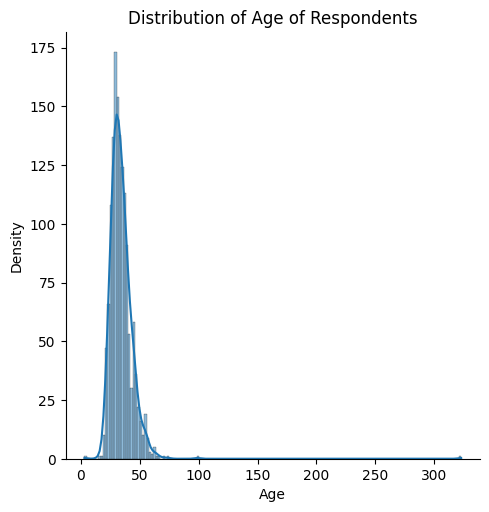

In [6]:
# plot the distribution of the age of the respondents and the total number of respondents
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.displot(df['age'], kde=True)
plt.title('Distribution of Age of Respondents')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


Text(0.5, 1.0, 'Total Number of Respondents by Age')

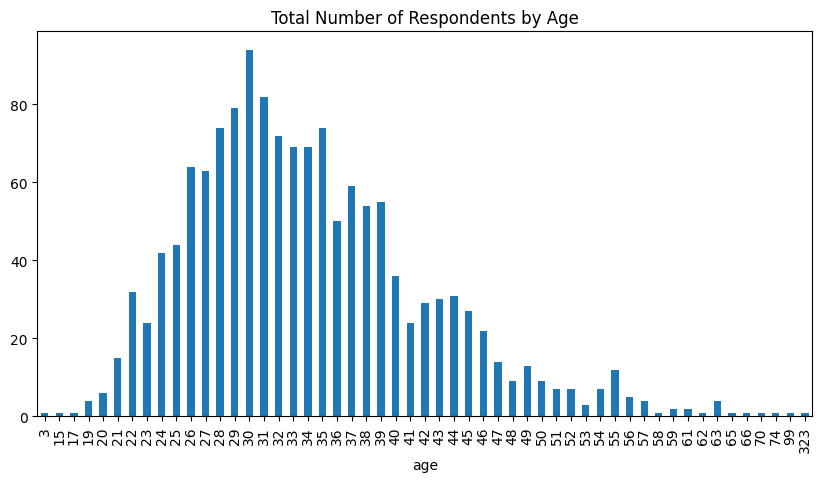

In [7]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Total Number of Respondents by Age')

In [8]:
# drop ages too high or too low
df = df[df['age'] <= 75]
df = df[df['age'] >= 18]


In [9]:
# how many people work in a different country than they live in
df.query('country_live_in != country_work_in').shape[0]
df.query('us_state_live_in != us_state_work_in').shape[0]

634

In [10]:
#Calculate percentage of missing values for each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing / df.shape[0] * 100
missing

num_employees                                                         20.028011
tech_company                                                          20.028011
tech_role                                                             81.582633
mental_health_benefits                                                20.028011
mental_health_coverage_options                                        29.271709
employer_discussed_mental_health                                      20.028011
employer_mental_health_resources                                      20.028011
anonymity_protected                                                   20.028011
ease_of_requesting_leave                                              20.028011
negative_consequences_discussing_mental_health                        20.028011
negative_consequences_discussing_physical_health                      20.028011
comfortable_discussing_mental_health_coworkers                        20.028011
comfortable_discussing_mental_health_sup

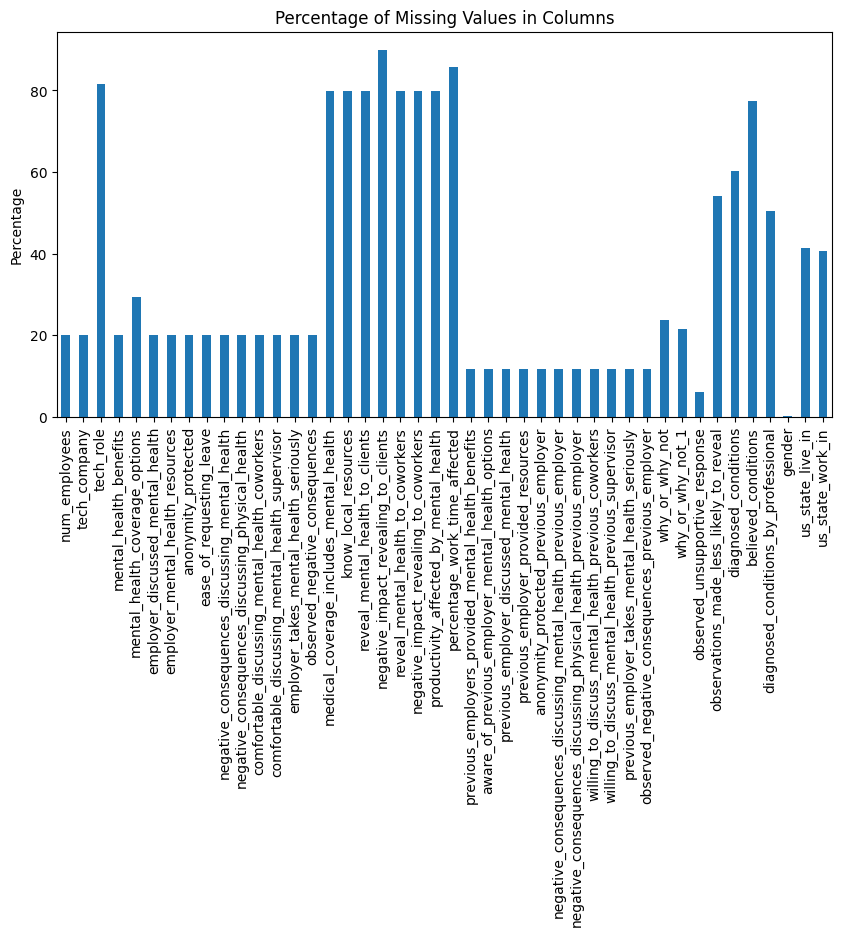

In [11]:
missing.plot(kind='bar', figsize=(10, 5))
plt.title('Percentage of Missing Values in Columns')
plt.ylabel('Percentage')
plt.show()


In [12]:
df['work_where_lives'] = ((df['country_live_in'] == df['country_work_in']) & (df['us_state_live_in'] == df['us_state_work_in'])) | ((df['country_live_in'] == df['country_work_in']) & (df["country_live_in"] != 'United States of America'))
df['work_where_lives'] = df['work_where_lives'].map({True: 1, False: 0})
df['work_where_lives'].value_counts()

work_where_lives
1    1361
0      67
Name: count, dtype: int64

In [13]:
df.head()

,self_employed,num_employees,tech_company,tech_role,mental_health_benefits,mental_health_coverage_options,employer_discussed_mental_health,employer_mental_health_resources,anonymity_protected,ease_of_requesting_leave,negative_consequences_discussing_mental_health,negative_consequences_discussing_physical_health,comfortable_discussing_mental_health_coworkers,comfortable_discussing_mental_health_supervisor,employer_takes_mental_health_seriously,observed_negative_consequences,medical_coverage_includes_mental_health,know_local_resources,reveal_mental_health_to_clients,negative_impact_revealing_to_clients,reveal_mental_health_to_coworkers,negative_impact_revealing_to_coworkers,productivity_affected_by_mental_health,percentage_work_time_affected,previous_employers,previous_employers_provided_mental_health_benefits,aware_of_previous_employer_mental_health_options,previous_employer_discussed_mental_health,previous_employer_provided_resources,anonymity_protected_previous_employer,negative_consequences_discussing_mental_health_previous_employer,negative_consequences_discussing_physical_health_previous_employer,willing_to_discuss_mental_health_previous_coworkers,willing_to_discuss_mental_health_previous_supervisor,previous_employer_takes_mental_health_seriously,observed_negative_consequences_previous_employer,willing_to_bring_up_physical_health_issue_in_interview,why_or_why_not,willing_to_bring_up_mental_health_issue_in_interview,why_or_why_not_1,mental_health_issue_hurt_career,team_members_view_negatively,willing_to_share_with_friends_and_family,observed_unsupportive_response,observations_made_less_likely_to_reveal,family_history_of_mental_illness,had_mental_health_disorder_in_past,currently_have_mental_health_disorder,diagnosed_conditions,believed_conditions,diagnosed_by_professional,diagnosed_conditions_by_professional,sought_treatment_from_professional,interferes_with_work_when_treated,interferes_with_work_when_not_treated,age,gender,country_live_in,us_state_live_in,country_work_in,us_state_work_in,work_position,work_remotely,work_where_lives
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes,1
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never,1
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,NaN,No,NaN,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Develope

In [14]:
col_to_drop = ['self_employed', 'tech_company', 'tech_role', 'percentage_work_time_affected', 
              'previous_employers', 'previous_employers_provided_mental_health_benefits', 'aware_of_previous_employer_mental_health_options', 
              'previous_employer_discussed_mental_health', 'previous_employer_provided_resources', 'anonymity_protected_previous_employer', 
              'negative_consequences_discussing_mental_health_previous_employer', 'negative_consequences_discussing_physical_health_previous_employer', 
              'willing_to_discuss_mental_health_previous_coworkers', 'willing_to_discuss_mental_health_previous_supervisor', 
              'previous_employer_takes_mental_health_seriously', 'observed_negative_consequences_previous_employer', 
              'diagnosed_conditions', 'believed_conditions', 
              'diagnosed_by_professional', 'diagnosed_conditions_by_professional', 
              'gender', 'country_live_in', 'why_or_why_not', 'why_or_why_not_1',
              'us_state_live_in', 'us_state_work_in', 'work_position']

df = df.drop(col_to_drop, axis=1)
df.head()

,num_employees,mental_health_benefits,mental_health_coverage_options,employer_discussed_mental_health,employer_mental_health_resources,anonymity_protected,ease_of_requesting_leave,negative_consequences_discussing_mental_health,negative_consequences_discussing_physical_health,comfortable_discussing_mental_health_coworkers,comfortable_discussing_mental_health_supervisor,employer_takes_mental_health_seriously,observed_negative_consequences,medical_coverage_includes_mental_health,know_local_resources,reveal_mental_health_to_clients,negative_impact_revealing_to_clients,reveal_mental_health_to_coworkers,negative_impact_revealing_to_coworkers,productivity_affected_by_mental_health,willing_to_bring_up_physical_health_issue_in_interview,willing_to_bring_up_mental_health_issue_in_interview,mental_health_issue_hurt_career,team_members_view_negatively,willing_to_share_with_friends_and_family,observed_unsupportive_response,observations_made_less_likely_to_reveal,family_history_of_mental_illness,had_mental_health_disorder_in_past,currently_have_mental_health_disorder,sought_treatment_from_professional,interferes_with_work_when_treated,interferes_with_work_when_not_treated,age,country_work_in,work_remotely,work_where_lives
0,26-100,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,0,Not applicable to me,Not applicable to me,39,United Kingdom,Sometimes,1
1,6-25,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,No,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,1,Rarely,Sometimes,29,United States of America,Never,1
2,6-25,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,1,Not applicable to me,Not applicable to me,38,United Kingdom,Always,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"Yes, I know several","Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",I'm not sure,Yes,Yes,Maybe,"Yes, I think it would",Maybe,Neutral,No,NaN,No,Yes,Yes,1,Sometimes,Sometimes,43,United Kingdom,Sometimes,1
4,6-25,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maybe,No,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,Yes,1,Sometimes,Sometimes,43,United States of America,Sometimes,1


In [15]:
print(f"Features with missing values: {len(missing)}")

Features with missing values: 44


In [16]:
col = 'num_employees'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

num_employees
26-100            292
More than 1000    255
100-500           247
6-25              208
500-1000           80
1-5                60
Name: count, dtype: int64
total nan values: 286


In [17]:
size_mapping = {
    '1-5': "1-100",
    '6-25': "1-100",
    '26-100': "1-100",
    '100-500': "100-1000",
    '500-1000': "100-1000",
    'More than 1000': "1000 +",
    0: 0
}

df[col] = df[col].map(size_mapping)

val_mapping.update({col: {
    '1-100': 1,
    '100-1000': 2,
    '1000 +': 3,
    0: 0
}})

df[col] = df[col].fillna(0)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

num_employees
1    560
2    327
0    286
3    255
Name: count, dtype: int64

In [18]:
col = 'mental_health_benefits'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

mental_health_benefits
Yes                                528
I don't know                       319
No                                 212
Not eligible for coverage / N/A     83
Name: count, dtype: int64
total nan values: 286


In [19]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    'Not eligible for coverage / N/A': 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

mental_health_benefits
 1    528
 2    319
 0    295
-1    286
Name: count, dtype: int64

In [20]:
col = 'mental_health_coverage_options'
print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

mental_health_coverage_options
No               352
I am not sure    351
Yes              307
Name: count, dtype: int64
total nan values: 418


In [21]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I am not sure": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

mental_health_coverage_options
-1    418
 0    352
 2    351
 1    307
Name: count, dtype: int64

In [22]:
col = 'employer_discussed_mental_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

employer_discussed_mental_health
No              811
Yes             229
I don't know    102
Name: count, dtype: int64
total nan values: 286


In [23]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

employer_discussed_mental_health
 0    811
-1    286
 1    229
 2    102
Name: count, dtype: int64

In [24]:
col = 'employer_mental_health_resources'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

employer_mental_health_resources
No              530
I don't know    318
Yes             294
Name: count, dtype: int64
total nan values: 286


In [25]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

employer_mental_health_resources
 0    530
 2    318
 1    294
-1    286
Name: count, dtype: int64

In [26]:
col = 'anonymity_protected'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

anonymity_protected
I don't know    739
Yes             319
No               84
Name: count, dtype: int64
total nan values: 286


In [27]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

anonymity_protected
 2    739
 1    319
-1    286
 0     84
Name: count, dtype: int64

In [28]:
col = 'ease_of_requesting_leave'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

ease_of_requesting_leave
Somewhat easy                 279
Very easy                     220
Somewhat difficult            198
Neither easy nor difficult    178
I don't know                  149
Very difficult                118
Name: count, dtype: int64
total nan values: 286


In [29]:
val_mapping.update({col: {
    'Very easy': 1,
    'Somewhat easy': 1,
    "Neither easy nor difficult": 3,
    'Somewhat difficult': 0,
    'Very difficult': 0,
    "I don't know": -1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

ease_of_requesting_leave
 1    499
-1    435
 0    316
 3    178
Name: count, dtype: int64

In [30]:
col = 'negative_consequences_discussing_mental_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

negative_consequences_discussing_mental_health
Maybe    486
No       436
Yes      220
Name: count, dtype: int64
total nan values: 286


In [31]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

negative_consequences_discussing_mental_health
 2    486
 0    436
-1    286
 1    220
Name: count, dtype: int64

In [32]:
col = 'negative_consequences_discussing_physical_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

negative_consequences_discussing_physical_health
No       833
Maybe    268
Yes       41
Name: count, dtype: int64
total nan values: 286


In [33]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

negative_consequences_discussing_physical_health
 0    833
-1    286
 2    268
 1     41
Name: count, dtype: int64

In [34]:
col = 'comfortable_discussing_mental_health_coworkers'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

comfortable_discussing_mental_health_coworkers
Maybe    477
No       391
Yes      274
Name: count, dtype: int64
total nan values: 286


In [35]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

comfortable_discussing_mental_health_coworkers
 2    477
 0    391
-1    286
 1    274
Name: count, dtype: int64

In [36]:
col = 'comfortable_discussing_mental_health_supervisor'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

comfortable_discussing_mental_health_supervisor
Yes      425
Maybe    381
No       336
Name: count, dtype: int64
total nan values: 286


In [37]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

comfortable_discussing_mental_health_supervisor
 1    425
 2    381
 0    336
-1    286
Name: count, dtype: int64

In [38]:
col = 'employer_takes_mental_health_seriously'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

employer_takes_mental_health_seriously
I don't know    491
Yes             349
No              302
Name: count, dtype: int64
total nan values: 286


In [39]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

employer_takes_mental_health_seriously
 2    491
 1    349
 0    302
-1    286
Name: count, dtype: int64

In [40]:
col = 'observed_negative_consequences'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

observed_negative_consequences
No     1045
Yes      97
Name: count, dtype: int64
total nan values: 286


In [41]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

observed_negative_consequences
 0    1045
-1     286
 1      97
Name: count, dtype: int64

In [42]:
col = 'medical_coverage_includes_mental_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

medical_coverage_includes_mental_health
1.0    185
0.0    101
Name: count, dtype: int64
total nan values: 1142


In [43]:
df[col] = df[col].fillna(-1)
df[col].value_counts()

medical_coverage_includes_mental_health
-1.0    1142
 1.0     185
 0.0     101
Name: count, dtype: int64

In [44]:
col = 'know_local_resources'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

know_local_resources
I know some             141
Yes, I know several      83
No, I don't know any     62
Name: count, dtype: int64
total nan values: 1142


In [45]:
val_mapping.update({col: {
    'Yes, I know several': 1,
    'I know some': 1,
    "No, I don't know any": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

know_local_resources
-1    1142
 1     224
 0      62
Name: count, dtype: int64

In [46]:
col = 'reveal_mental_health_to_clients'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

reveal_mental_health_to_clients
Not applicable to me                         100
No, because it would impact me negatively     83
Sometimes, if it comes up                     57
No, because it doesn't matter                 44
Yes, always                                    2
Name: count, dtype: int64
total nan values: 1142


In [47]:
val_mapping.update({col: {
    'Not applicable to me': 0,
    'No, because it would impact me negatively': 0,
    'Sometimes, if it comes up': 1,
    "No, because it doesn't matter": 0,
    'Yes, always': 1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

reveal_mental_health_to_clients
-1    1142
 0     227
 1      59
Name: count, dtype: int64

In [48]:
col = 'negative_impact_revealing_to_clients'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

negative_impact_revealing_to_clients
I'm not sure    66
No              42
Yes             36
Name: count, dtype: int64
total nan values: 1284


In [49]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I'm not sure": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

negative_impact_revealing_to_clients
-1    1284
 2      66
 0      42
 1      36
Name: count, dtype: int64

In [50]:
col = 'reveal_mental_health_to_coworkers'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

reveal_mental_health_to_coworkers
Not applicable to me                         110
Sometimes, if it comes up                     99
No, because it would impact me negatively     51
No, because it doesn't matter                 15
Yes, always                                   11
Name: count, dtype: int64
total nan values: 1142


In [51]:
val_mapping.update({col: {
    'Not applicable to me': 0,
    'No, because it would impact me negatively': 0,
    'Sometimes, if it comes up': 1,
    "No, because it doesn't matter": 0,
    'Yes, always': 1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

reveal_mental_health_to_coworkers
-1    1142
 0     176
 1     110
Name: count, dtype: int64

In [52]:
col = 'negative_impact_revealing_to_coworkers'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

negative_impact_revealing_to_coworkers
Not applicable to me    132
I'm not sure             62
No                       57
Yes                      35
Name: count, dtype: int64
total nan values: 1142


In [53]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I'm not sure": -1,
    "Not applicable to me": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

negative_impact_revealing_to_coworkers
-1    1204
 0     189
 1      35
Name: count, dtype: int64

In [54]:
col = 'productivity_affected_by_mental_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

productivity_affected_by_mental_health
Yes                     204
Unsure                   38
Not applicable to me     30
No                       14
Name: count, dtype: int64
total nan values: 1142


In [55]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Not applicable to me": 0,
    "Unsure": -1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

productivity_affected_by_mental_health
-1    1180
 1     204
 0      44
Name: count, dtype: int64

In [56]:
col = 'willing_to_bring_up_physical_health_issue_in_interview'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

willing_to_bring_up_physical_health_issue_in_interview
Maybe    631
No       441
Yes      356
Name: count, dtype: int64
total nan values: 0


In [57]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

willing_to_bring_up_physical_health_issue_in_interview
2    631
0    441
1    356
Name: count, dtype: int64

In [58]:
col = 'willing_to_bring_up_mental_health_issue_in_interview'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

willing_to_bring_up_mental_health_issue_in_interview
No       882
Maybe    436
Yes      110
Name: count, dtype: int64
total nan values: 0


In [59]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

willing_to_bring_up_mental_health_issue_in_interview
0    882
2    436
1    110
Name: count, dtype: int64

In [60]:
col = 'mental_health_issue_hurt_career'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

mental_health_issue_hurt_career
Maybe                         584
Yes, I think it would         563
No, I don't think it would    146
Yes, it has                   105
No, it has not                 30
Name: count, dtype: int64
total nan values: 0


In [61]:
val_mapping.update({col: {
    "Maybe": 2,
    "Yes, I think it would": 1,
    "No, I don't think it would": 0,
    "Yes, it has": 1,
    "No, it has not": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

mental_health_issue_hurt_career
1    668
2    584
0    176
Name: count, dtype: int64

In [62]:
col = 'team_members_view_negatively'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

team_members_view_negatively
Maybe                           590
Yes, I think they would         402
No, I don't think they would    345
No, they do not                  49
Yes, they do                     42
Name: count, dtype: int64
total nan values: 0


In [63]:
val_mapping.update({col: {
    "Maybe": 2,
    "Yes, I think they would": 1,
    "No, I don't think they would": 0,
    "Yes, they do": 1,
    "No, they do not": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

team_members_view_negatively
2    590
1    444
0    394
Name: count, dtype: int64

In [64]:
col = 'willing_to_share_with_friends_and_family'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

willing_to_share_with_friends_and_family
Somewhat open                                            638
Very open                                                251
Somewhat not open                                        214
Neutral                                                  140
Not applicable to me (I do not have a mental illness)    111
Not open at all                                           74
Name: count, dtype: int64
total nan values: 0


In [65]:
val_mapping.update({col: {
    "Somewhat open": 1,
    "Very open": 1,
    "Neutral": 2,
    "Not applicable to me (I do not have a mental illness)": 0,
    "Somewhat not open": 0,
    "Not open at all": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

willing_to_share_with_friends_and_family
1    889
0    399
2    140
Name: count, dtype: int64

In [66]:
col = 'observed_unsupportive_response'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

observed_unsupportive_response
No                    567
Maybe/Not sure        344
Yes, I observed       263
Yes, I experienced    166
Name: count, dtype: int64
total nan values: 88


In [67]:
val_mapping.update({col: {
    "No" : 0,
    "Maybe/Not sure" : 2,
    "Yes, I observed" : 1,
    "Yes, I experienced" : 1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

observed_unsupportive_response
 0    567
 1    429
 2    344
-1     88
Name: count, dtype: int64

In [68]:
col = 'observations_made_less_likely_to_reveal'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

observations_made_less_likely_to_reveal
Yes      244
No       234
Maybe    176
Name: count, dtype: int64
total nan values: 774


In [69]:
val_mapping.update({col: {
    "Yes" : 1,
    "Maybe" : 2,
    "No" : 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

observations_made_less_likely_to_reveal
-1    774
 1    244
 0    234
 2    176
Name: count, dtype: int64

In [70]:
col = 'family_history_of_mental_illness'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

family_history_of_mental_illness
Yes             668
No              486
I don't know    274
Name: count, dtype: int64
total nan values: 0


In [71]:
val_mapping.update({col: {
    "Yes" : 1,
    "No" : 0,
    "I don't know" : 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

family_history_of_mental_illness
1    668
0    486
2    274
Name: count, dtype: int64

In [72]:
col = 'had_mental_health_disorder_in_past'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

had_mental_health_disorder_in_past
Yes      734
No       448
Maybe    246
Name: count, dtype: int64
total nan values: 0


In [73]:
val_mapping.update({col: {
    "Yes" : 1,
    "No" : 0,
    "Maybe" : 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

had_mental_health_disorder_in_past
1    734
0    448
2    246
Name: count, dtype: int64

In [74]:
col = 'currently_have_mental_health_disorder'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

currently_have_mental_health_disorder
Yes      574
No       528
Maybe    326
Name: count, dtype: int64
total nan values: 0


In [75]:
val_mapping.update({col: {
    "Yes" : 1,
    "No" : 0,
    "Maybe" : 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

currently_have_mental_health_disorder
1    574
0    528
2    326
Name: count, dtype: int64

In [76]:
col = 'sought_treatment_from_professional'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

sought_treatment_from_professional
1    837
0    591
Name: count, dtype: int64
total nan values: 0


In [77]:
col = 'interferes_with_work_when_treated'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

interferes_with_work_when_treated
Not applicable to me    555
Sometimes               369
Rarely                  320
Never                   119
Often                    65
Name: count, dtype: int64
total nan values: 0


In [78]:
val_mapping.update({col: {
    "Often" : 1,
    "Sometimes" : 2,
    "Rarely" : 2,
    "Never" : 0,
    "Not applicable to me" : 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

interferes_with_work_when_treated
2    689
0    674
1     65
Name: count, dtype: int64

In [79]:
col = 'interferes_with_work_when_not_treated'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

interferes_with_work_when_not_treated
Often                   537
Not applicable to me    466
Sometimes               361
Rarely                   52
Never                    12
Name: count, dtype: int64
total nan values: 0


In [80]:
val_mapping.update({col: {
    "Often" : 1,
    "Sometimes" : 2,
    "Rarely" : 2,
    "Never" : 0,
    "Not applicable to me" : 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

interferes_with_work_when_not_treated
1    537
0    478
2    413
Name: count, dtype: int64

In [81]:
col = 'country_work_in'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

country_work_in
United States of America    849
United Kingdom              183
Canada                       72
Germany                      58
Netherlands                  47
Australia                    34
Sweden                       20
Ireland                      15
France                       14
Switzerland                  10
Russia                        9
Brazil                        9
India                         9
New Zealand                   9
Bulgaria                      7
Finland                       7
Denmark                       7
Belgium                       5
Poland                        4
South Africa                  4
Austria                       4
Chile                         3
Romania                       3
Italy                         3
Norway                        3
Spain                         3
Czech Republic                3
Pakistan                      2
Mexico                        2
Israel                        2
Other                   

In [82]:
region_map = {
    'North America': ['United States of America', 'Canada', 'Mexico', 'Costa Rica', 'Guatemala'],
    'Europe': ['United Kingdom', 'Germany', 'Netherlands', 'France', 'Spain', 'Ireland', 'Sweden', 'Switzerland', 'Poland', 'Italy', 'Belgium', 'Portugal', 'Austria', 'Norway', 'Finland', 'Denmark', 'Greece', 'Hungary', 'Czech Republic', 'Romania', 'Slovakia', 'Slovenia', 'Croatia', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Cyprus', 'Iceland', 'Russia', 'Bosnia and Herzegovina', 'Serbia'],
    'Asia': ['India', 'Australia', 'New Zealand', 'Singapore', 'Japan', 'Pakistan', 'Israel', 'Afghanistan', 'Bangladesh', 'Turkey', 'Vietnam', 'Iran', 'Brunei', 'China', 'United Arab Emirates'],
    'Africa': ['South Africa'],
    'South America': ['Brazil', 'Colombia', 'Chile', 'Argentina', 'Venezuela', 'Ecuador'],
    'Central America': ['Mexico']
}

def get_continent(country):
    for continent, countries in region_map.items():
        if country in countries:
            return continent
    return 'Other'

df[col] = df[col].apply(get_continent)
df.rename(columns={'country_work_in': 'area_work_in'}, inplace=True)
col = 'area_work_in'
df[col].value_counts()


area_work_in
North America    925
Europe           414
Asia              66
South America     17
Africa             4
Other              2
Name: count, dtype: int64

In [83]:
val_mapping.update({col: {
    'North America': 1,
    'Europe': 2,
    'Asia': 3,
    'South America': 4,
    'Africa': 5,
    'Central America': 6,
    'Other': 0
}})

df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

area_work_in
1    925
2    414
3     66
4     17
5      4
0      2
Name: count, dtype: int64

In [84]:
col = 'work_remotely'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

work_remotely
Sometimes    753
Always       342
Never        333
Name: count, dtype: int64
total nan values: 0


In [85]:
val_mapping.update({col: {
    "Sometimes" : 2,
    "Always" : 1,
    "Never" : 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

work_remotely
2    753
1    342
0    333
Name: count, dtype: int64

In [86]:
col = 'work_where_lives'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

work_where_lives
1    1361
0      67
Name: count, dtype: int64
total nan values: 0


In [87]:
df.head()

,num_employees,mental_health_benefits,mental_health_coverage_options,employer_discussed_mental_health,employer_mental_health_resources,anonymity_protected,ease_of_requesting_leave,negative_consequences_discussing_mental_health,negative_consequences_discussing_physical_health,comfortable_discussing_mental_health_coworkers,comfortable_discussing_mental_health_supervisor,employer_takes_mental_health_seriously,observed_negative_consequences,medical_coverage_includes_mental_health,know_local_resources,reveal_mental_health_to_clients,negative_impact_revealing_to_clients,reveal_mental_health_to_coworkers,negative_impact_revealing_to_coworkers,productivity_affected_by_mental_health,willing_to_bring_up_physical_health_issue_in_interview,willing_to_bring_up_mental_health_issue_in_interview,mental_health_issue_hurt_career,team_members_view_negatively,willing_to_share_with_friends_and_family,observed_unsupportive_response,observations_made_less_likely_to_reveal,family_history_of_mental_illness,had_mental_health_disorder_in_past,currently_have_mental_health_disorder,sought_treatment_from_professional,interferes_with_work_when_treated,interferes_with_work_when_not_treated,age,area_work_in,work_remotely,work_where_lives
0,1,0,-1,0,0,2,1,0,0,2,1,2,0,-1.0,-1,-1,-1,-1,-1,-1,2,2,2,0,1,0,-1,0,1,0,0,0,0,39,2,2,1
1,1,0,1,1,1,1,1,0,0,2,1,1,0,-1.0,-1,-1,-1,-1,-1,-1,2,0,0,0,1,0,-1,1,1,1,1,2,2,29,1,0,1
2,1,0,-1,0,0,2,3,2,0,2,2,2,0,-1.0,-1,-1,-1,-1,-1,-1,1,1,2,2,1,2,1,0,2,0,1,0,0,38,2,1,1
3,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.0,1,1,2,1,-1,1,1,2,1,2,2,0,-1,0,1,1,1,2,2,43,2,2,1
4,1,1,1,0,0,0,3,1,2,2,0,0,0,-1.0,-1,-1,-1,-1,-1,-1,2,0,1,2,1,1,1,1,1,1,1,2,2,43,1,2,1


In [88]:
df.isna().sum()

num_employees                                             0
mental_health_benefits                                    0
mental_health_coverage_options                            0
employer_discussed_mental_health                          0
employer_mental_health_resources                          0
anonymity_protected                                       0
ease_of_requesting_leave                                  0
negative_consequences_discussing_mental_health            0
negative_consequences_discussing_physical_health          0
comfortable_discussing_mental_health_coworkers            0
comfortable_discussing_mental_health_supervisor           0
employer_takes_mental_health_seriously                    0
observed_negative_consequences                            0
medical_coverage_includes_mental_health                   0
know_local_resources                                      0
reveal_mental_health_to_clients                           0
negative_impact_revealing_to_clients    

In [89]:
df.to_csv('cleaned_data.csv', index=False)

In [90]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,num_employees,mental_health_benefits,mental_health_coverage_options,employer_discussed_mental_health,employer_mental_health_resources,anonymity_protected,ease_of_requesting_leave,negative_consequences_discussing_mental_health,negative_consequences_discussing_physical_health,comfortable_discussing_mental_health_coworkers,comfortable_discussing_mental_health_supervisor,employer_takes_mental_health_seriously,observed_negative_consequences,medical_coverage_includes_mental_health,know_local_resources,reveal_mental_health_to_clients,negative_impact_revealing_to_clients,reveal_mental_health_to_coworkers,negative_impact_revealing_to_coworkers,productivity_affected_by_mental_health,willing_to_bring_up_physical_health_issue_in_interview,willing_to_bring_up_mental_health_issue_in_interview,mental_health_issue_hurt_career,team_members_view_negatively,willing_to_share_with_friends_and_family,observed_unsupportive_response,observations_made_less_likely_to_reveal,family_history_of_mental_illness,had_mental_health_disorder_in_past,currently_have_mental_health_disorder,sought_treatment_from_professional,interferes_with_work_when_treated,interferes_with_work_when_not_treated,age,area_work_in,work_remotely,work_where_lives
0,1,0,-1,0,0,2,1,0,0,2,1,2,0,-1.0,-1,-1,-1,-1,-1,-1,2,2,2,0,1,0,-1,0,1,0,0,0,0,39,2,2,1
1,1,0,1,1,1,1,1,0,0,2,1,1,0,-1.0,-1,-1,-1,-1,-1,-1,2,0,0,0,1,0,-1,1,1,1,1,2,2,29,1,0,1
2,1,0,-1,0,0,2,3,2,0,2,2,2,0,-1.0,-1,-1,-1,-1,-1,-1,1,1,2,2,1,2,1,0,2,0,1,0,0,38,2,1,1
3,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1.0,1,1,2,1,-1,1,1,2,1,2,2,0,-1,0,1,1,1,2,2,43,2,2,1
4,1,1,1,0,0,0,3,1,2,2,0,0,0,-1.0,-1,-1,-1,-1,-1,-1,2,0,1,2,1,1,1,1,1,1,1,2,2,43,1,2,1


In [ ]:
df.describe()

,num_employees,mental_health_benefits,mental_health_coverage_options,employer_discussed_mental_health,employer_mental_health_resources,anonymity_protected,ease_of_requesting_leave,negative_consequences_discussing_mental_health,negative_consequences_discussing_physical_health,comfortable_discussing_mental_health_coworkers,comfortable_discussing_mental_health_supervisor,employer_takes_mental_health_seriously,observed_negative_consequences,medical_coverage_includes_mental_health,know_local_resources,reveal_mental_health_to_clients,negative_impact_revealing_to_clients,reveal_mental_health_to_coworkers,negative_impact_revealing_to_coworkers,productivity_affected_by_mental_health,willing_to_bring_up_physical_health_issue_in_interview,willing_to_bring_up_mental_health_issue_in_interview,mental_health_issue_hurt_career,team_members_view_negatively,willing_to_share_with_friends_and_family,observed_unsupportive_response,observations_made_less_likely_to_reveal,family_history_of_mental_illness,had_mental_health_disorder_in_past,currently_have_mental_health_disorder,sought_treatment_from_professional,interferes_with_work_when_treated,interferes_with_work_when_not_treated,age,area_work_in,work_remotely,work_where_lives
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,1.385854,0.616246,0.413866,0.102941,0.450980,1.058123,0.418768,0.634454,0.203782,0.659664,0.630952,0.731793,-0.132353,-0.670168,-0.642857,-0.758403,-0.781513,-0.722689,-0.818627,-0.683473,1.133053,0.687675,1.285714,1.137255,0.818627,0.720588,-0.124650,0.851541,0.858543,0.858543,0.586134,1.010504,0.954482,34.086134,1.427871,1.294118,0.953081
std,0.997683,1.041434,1.149146,0.797626,1.046089,1.172619,1.265569,1.146331,0.968928,1.137559,1.080668,1.133758,0.500865,0.693169,0.737359,0.515798,0.706280,0.595583,0.444561,0.708804,0.856452,0.908846,0.671488,0.818967,0.587194,0.898303,1.091411,0.714514,0.682870,0.760549,0.492698,0.977262,0.788868,8.086273,0.667375,0.821262,0.211539
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,2.000000,1.000000
75%,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,0.000000,2.000000,2.000000,2.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,39.000000,2.000000,2.000000,1.000000
max,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00

In [114]:
# Create a DataFrame to store the feature names and their percentages
feature_percentages = pd.DataFrame(columns=['Feature', 'Percentage'])

# Iterate through the columns in the DataFrame
for col in df.columns:
    if col in val_mapping:
        real_name = val_mapping[col]
    else:
        real_name = col
    
    # Calculate the percentage of each value in the column
    percentage = {}
    for value in df[col].unique():
        name = -1
        if col not in val_mapping:
            name = value
        else:
            for key in val_mapping[col]:
                if val_mapping[col][key] == value:
                    name = key
                    break
        name = name if name != -1 else 'Not given'
        percentage[name] = df[col].value_counts(normalize=True).get(value, 0) * 100

    # Sort the dictionary by the percentage
    percentage = dict(sorted(percentage.items(), key=lambda item: item[1], reverse=True))

    
    feature_percentages = pd.concat([feature_percentages, pd.DataFrame({'Feature': [col], 'Percentage': [percentage]})], ignore_index=True)

# Display the DataFrame
pd.set_option('display.max_colwidth', None)
feature_percentages

,Feature,Percentage
0,num_employees,"{'1-100': 39.21568627450981, '100-1000': 22.899159663865547, 0: 20.028011204481793, '1000 +': 17.857142857142858}"
1,mental_health_benefits,"{'Yes': 36.97478991596639, 'I don't know': 22.338935574229694, 'No': 20.658263305322127, 'Not given': 20.028011204481793}"
2,mental_health_coverage_options,"{'Not given': 29.271708683473392, 'No': 24.649859943977592, 'I am not sure': 24.579831932773107, 'Yes': 21.498599439775912}"
3,employer_discussed_mental_health,"{'No': 56.792717086834735, 'Not given': 20.028011204481793, 'Yes': 16.03641456582633, 'I don't know': 7.142857142857142}"
4,employer_mental_health_resources,"{'No': 37.11484593837535, 'I don't know': 22.268907563025213, 'Yes': 20.588235294117645, 'Not given': 20.028011204481793}"
5,anonymity_protected,"{'I don't know': 51.75070028011205, 'Yes': 22.338935574229694, 'Not given': 20.028011204481793, 'No': 5.88235294117647}"
6,ease_of_requesting_leave,"{'Very easy': 34.943977591036415, 'I don't know': 30.462184873949578, 'Somewhat difficult': 22.128851540616246, 'Neither easy nor difficult': 12.46498599439776}"
7,negative_consequences_discussing_mental_health,"{'Maybe': 34.03361344537815, 'No': 30.532212885154063, 'Not given': 20.028011204481793, 'Yes': 15.406162464985995}"
8,negative_consequences_discussing_physical_health,"{'No': 58.333333333333336, 'Not given': 20.028011204481793, 'Maybe': 18.76750700280112, 'Yes': 2.8711484593837535}"
9,comfortable_discussing_mental_health_coworkers,"{'Maybe': 33.403361344537814, 'No': 27.380952380952383, 'Not given': 20.028011204481793, 'Yes': 19.187675070028014}"


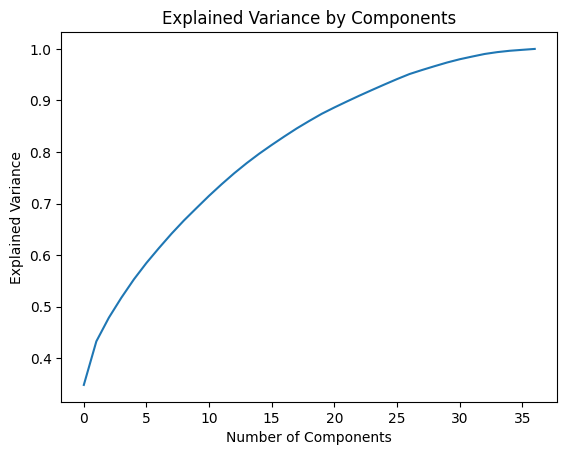

In [92]:
# apply PCA to the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(df_scaled)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
plt.plot(exp_var_cumul)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

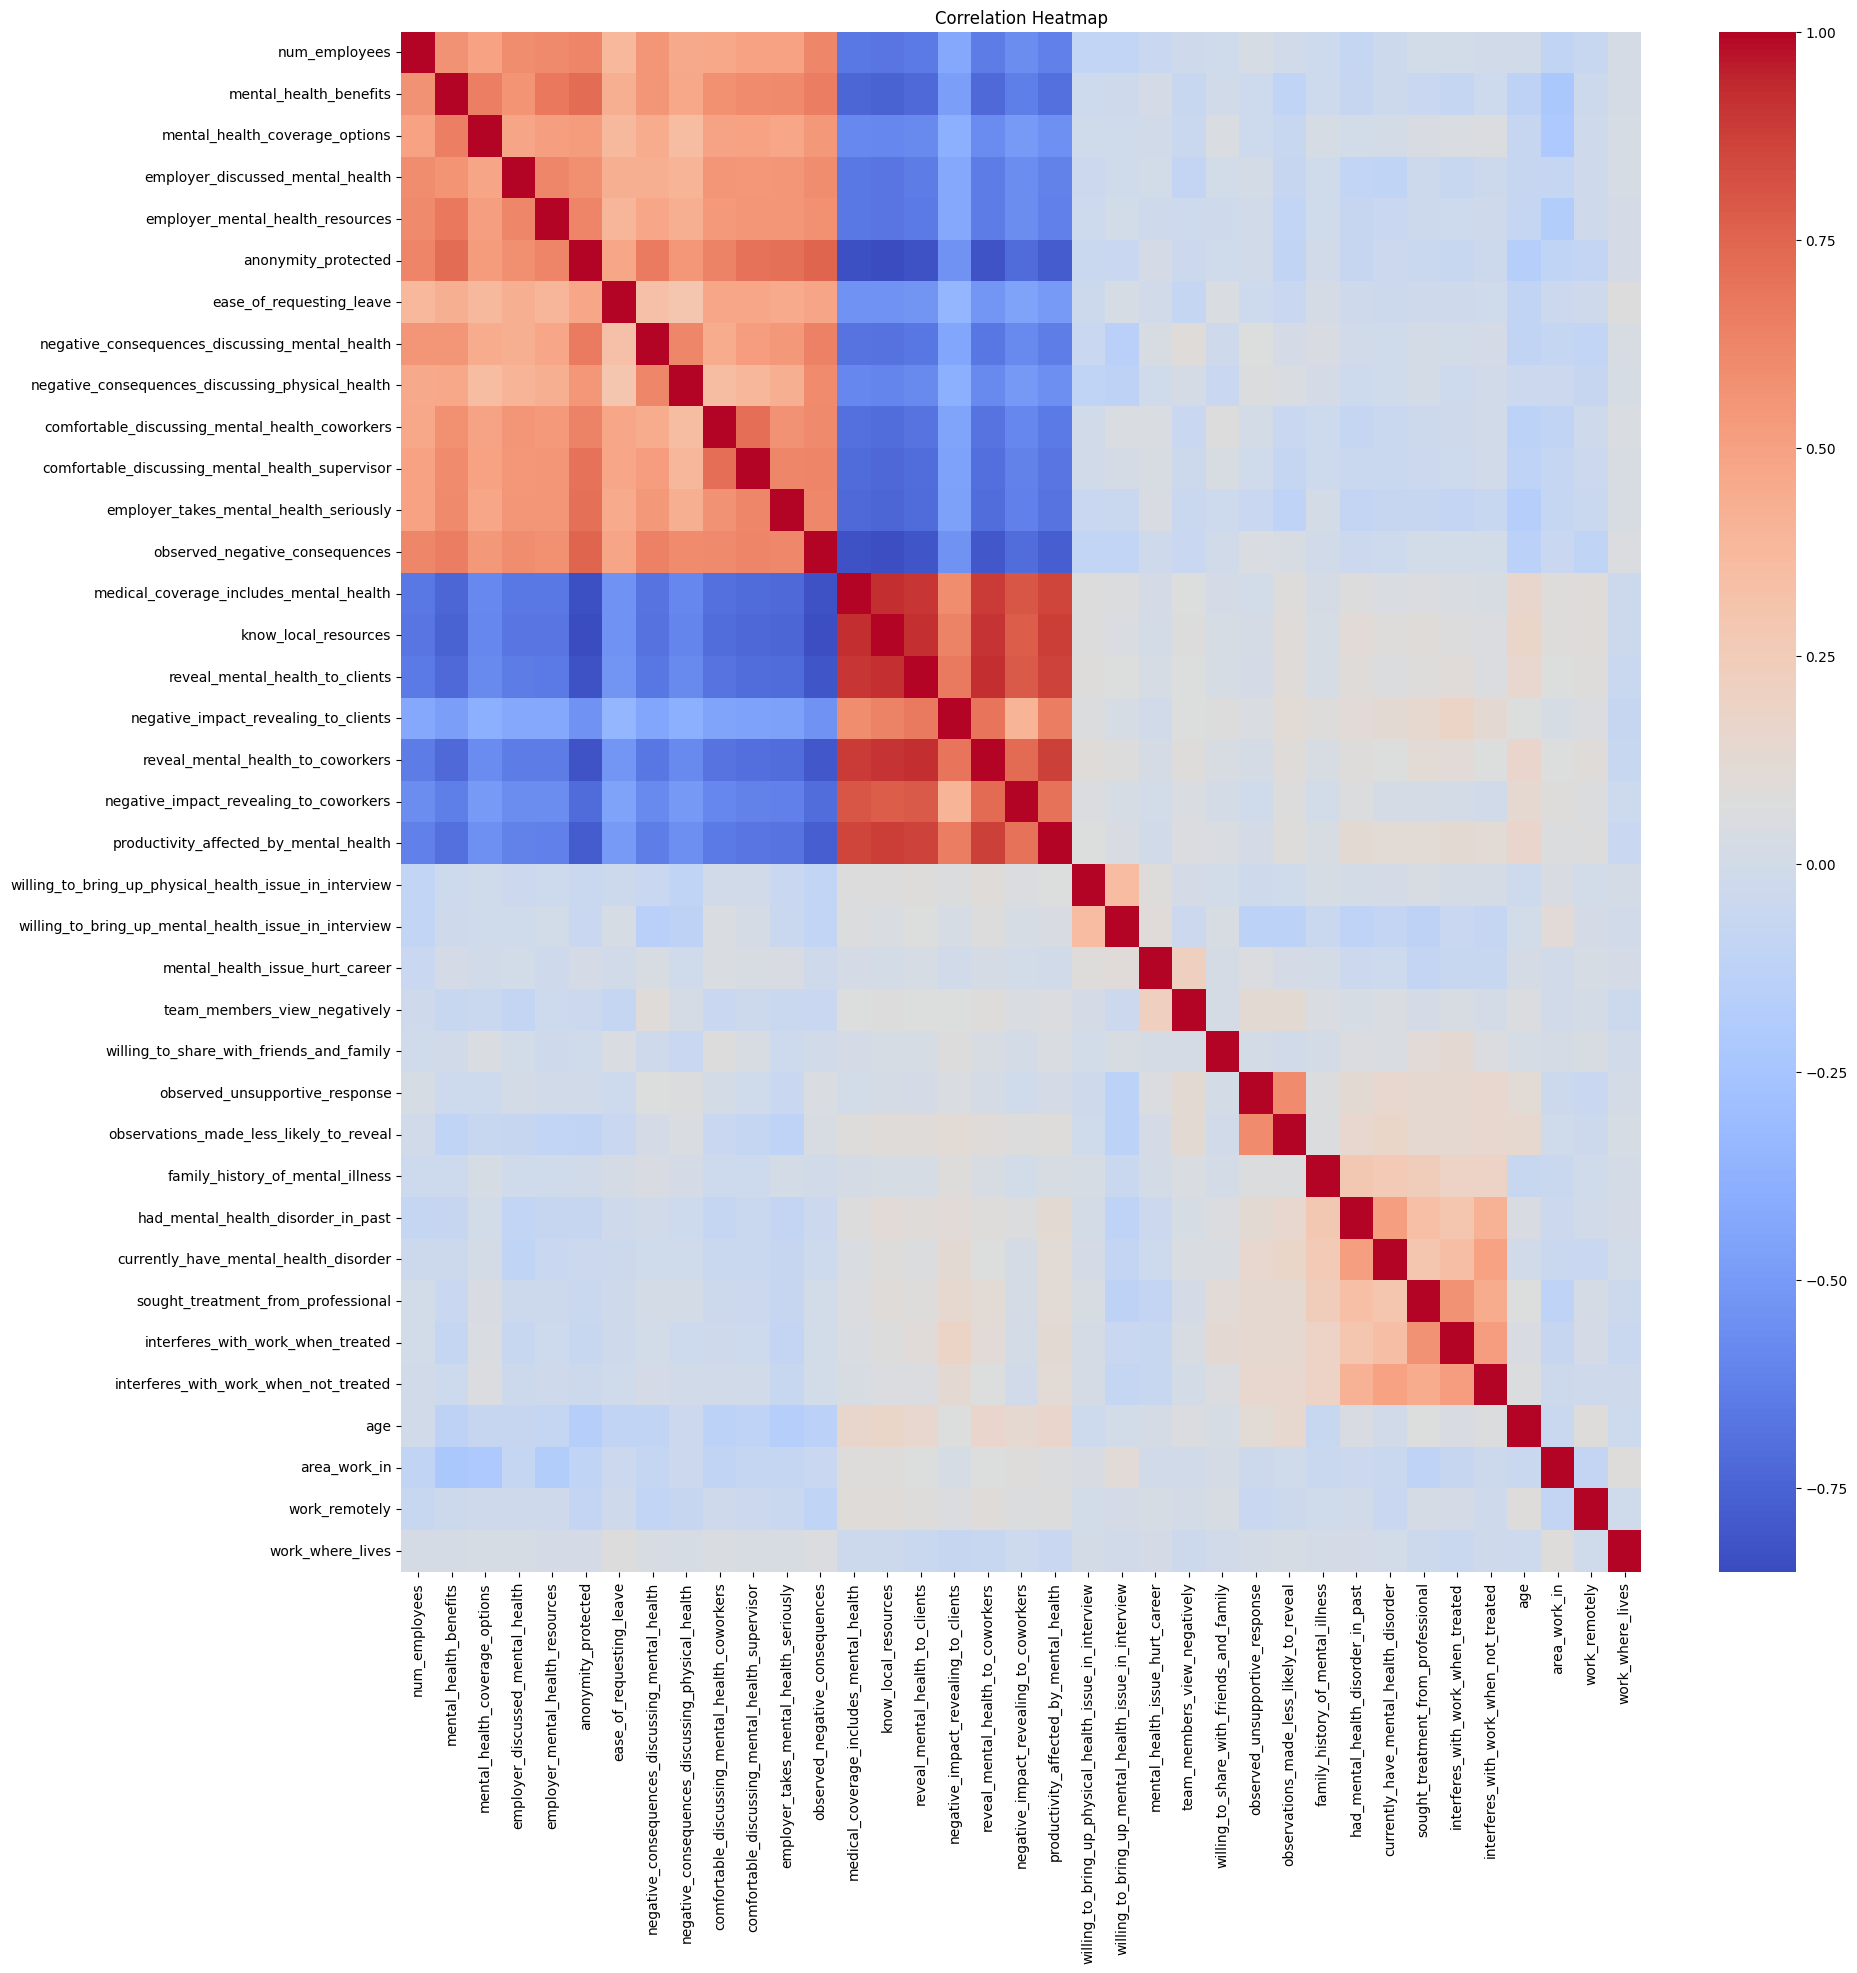

In [93]:
# check correlation between features
correlation = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


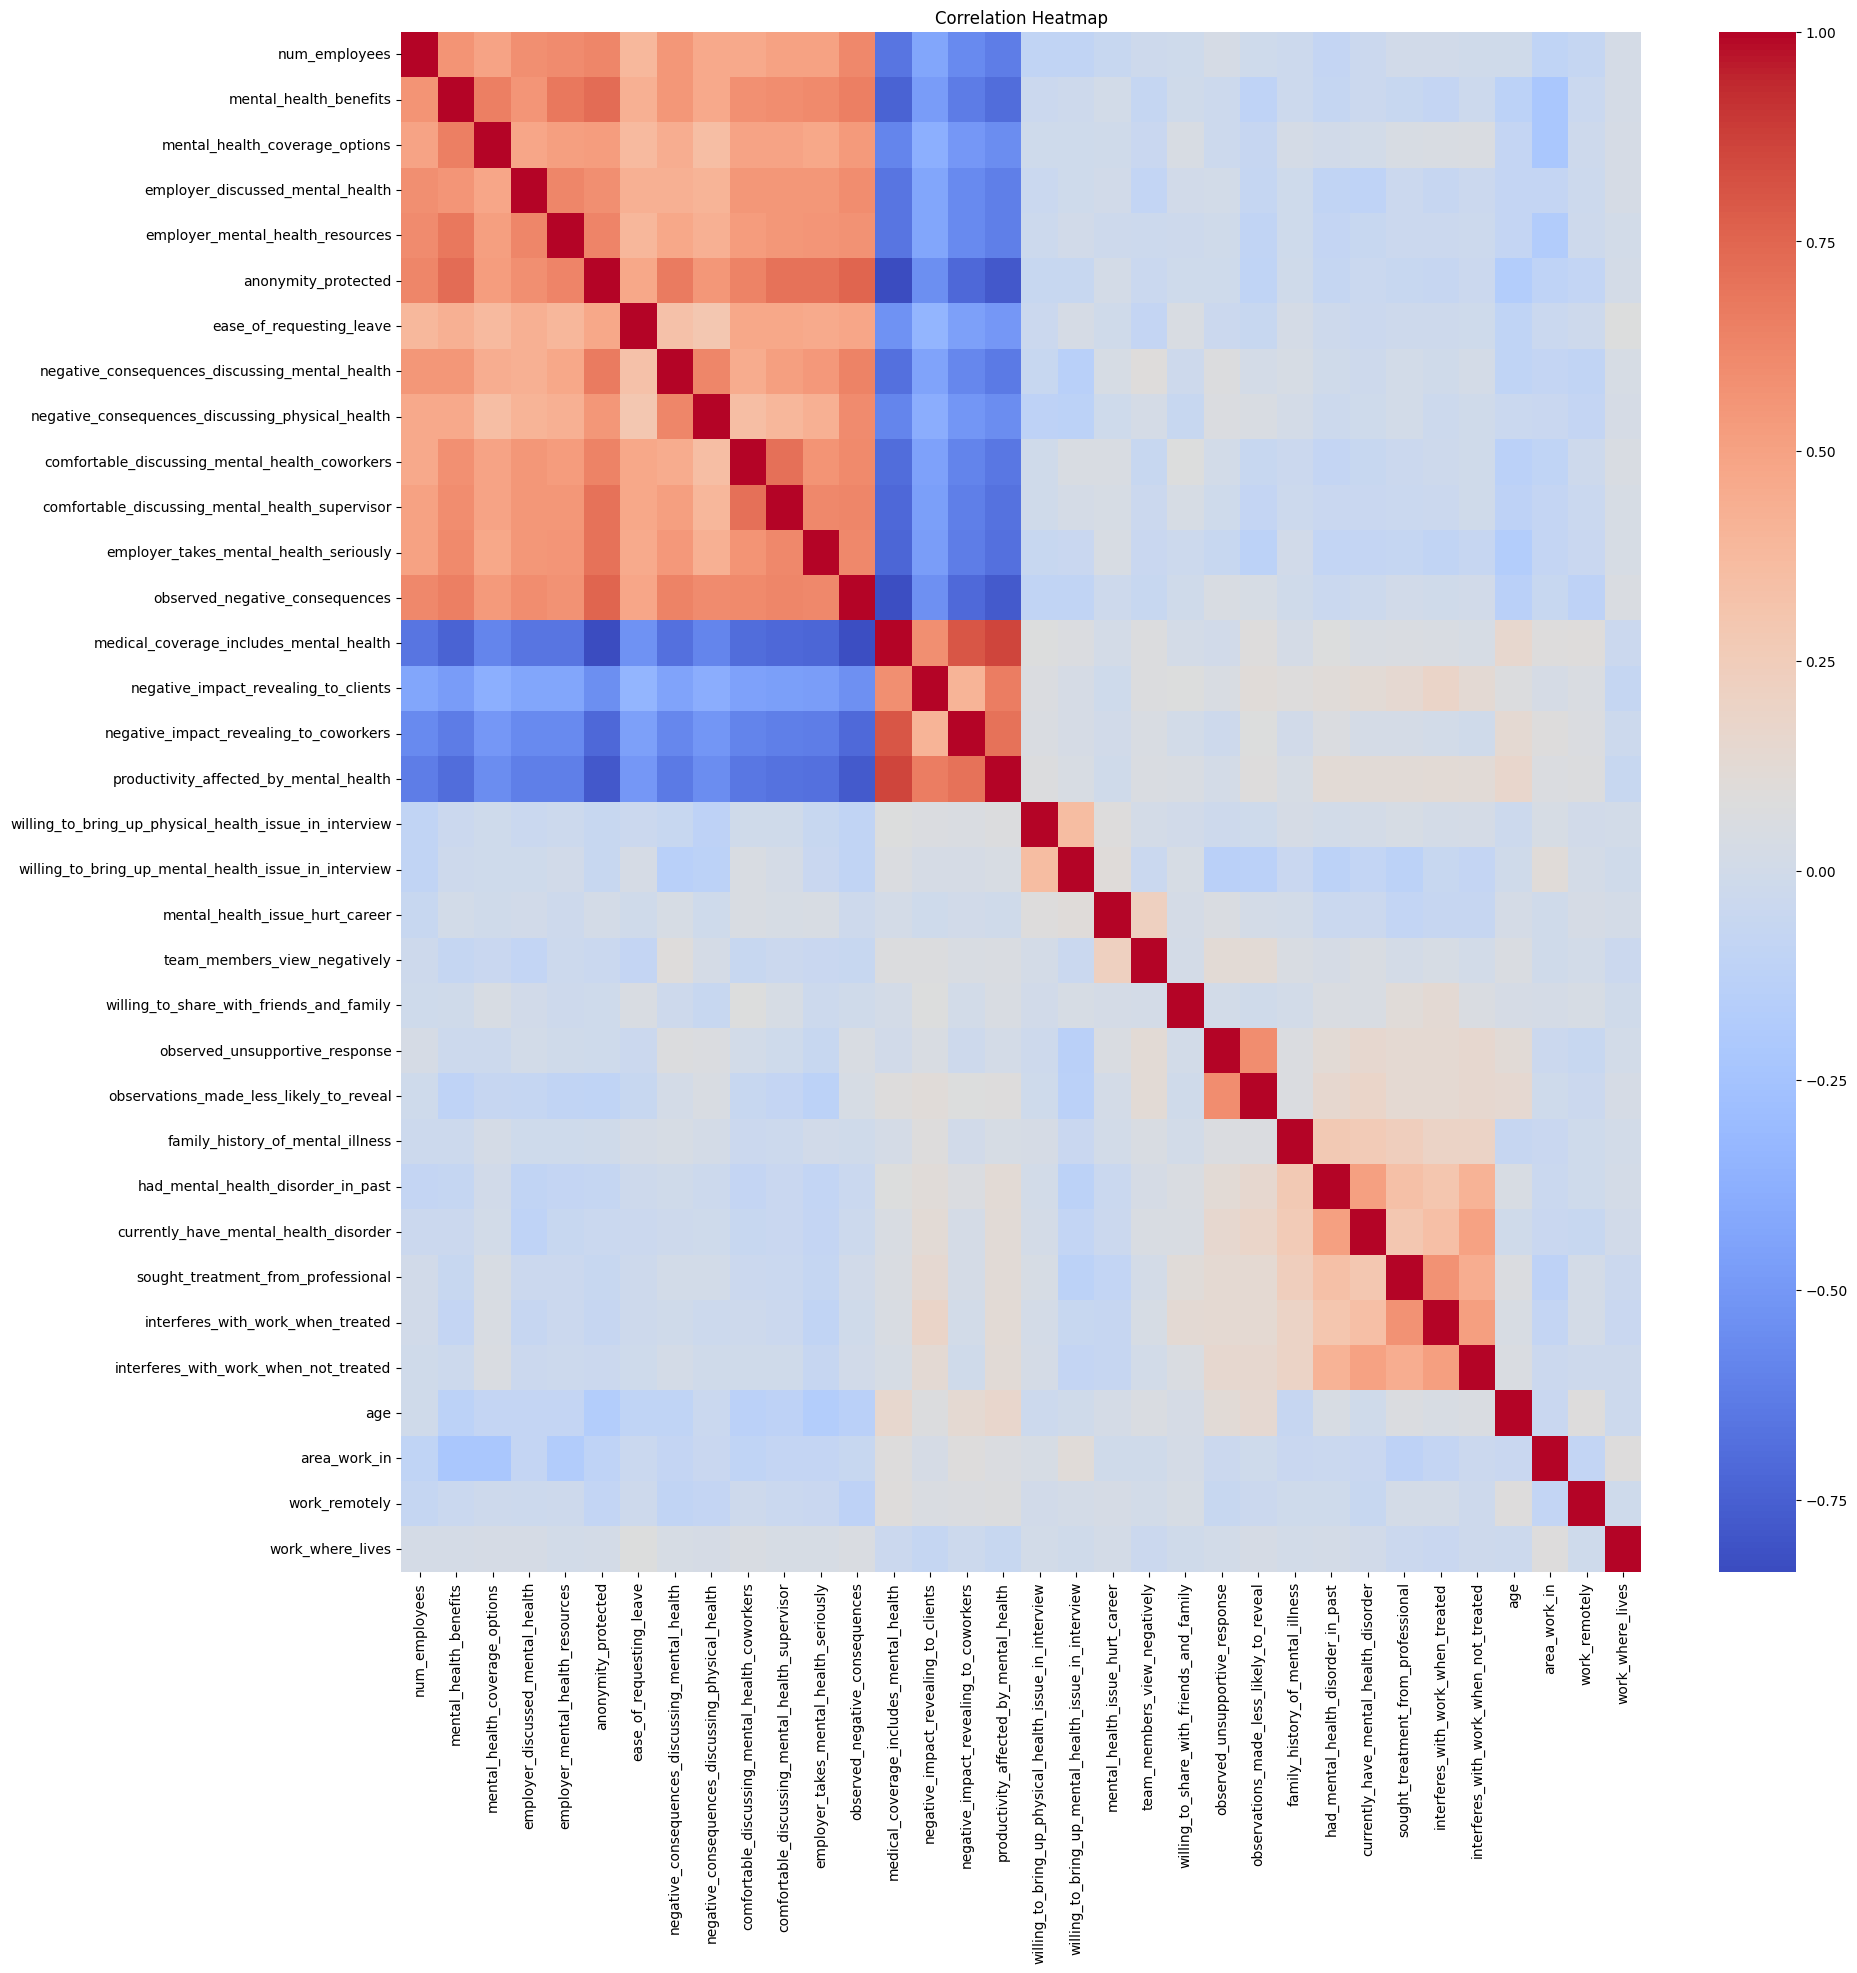

In [94]:
# remove highly correlated features

def remove_correlated_features(df, threshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(to_drop, axis=1)

df = remove_correlated_features(df, 0.9)
correlation = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Explained variance ratio: [0.30099783 0.09197566]
Features in order of importance for PC1:
medical_coverage_includes_mental_health: 0.292782399425028
productivity_affected_by_mental_health: 0.27957811830274987
anonymity_protected: 0.27628830136713645
observed_negative_consequences: 0.2674165013933849
mental_health_benefits: 0.25582325327495326
negative_impact_revealing_to_coworkers: 0.25385408908834833
comfortable_discussing_mental_health_supervisor: 0.24503290975892378
employer_takes_mental_health_seriously: 0.24450123534011656
employer_mental_health_resources: 0.23587615800344738
comfortable_discussing_mental_health_coworkers: 0.23535420299008433
num_employees: 0.23015704609336585
employer_discussed_mental_health: 0.2301014444185197
negative_consequences_discussing_mental_health: 0.22804501781510036
mental_health_coverage_options: 0.21016354941253407
negative_impact_revealing_to_clients: 0.20203209973503053
negative_consequences_discussing_physical_health: 0.19888573069274207
ease_of

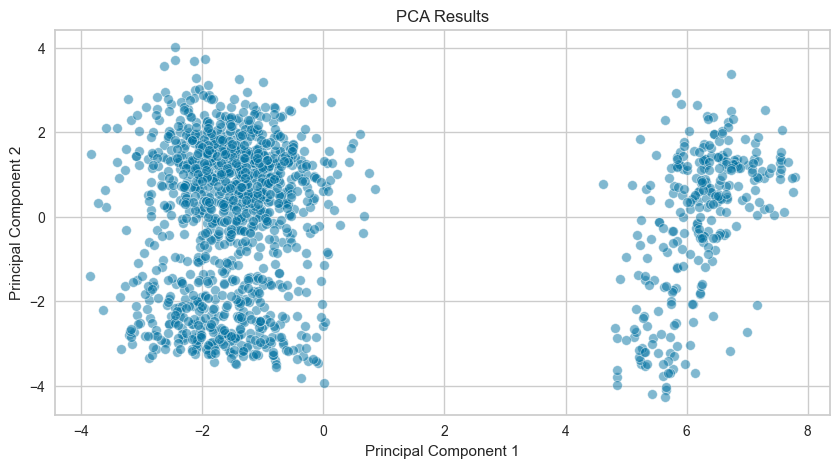

In [120]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'data'
# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# Calculate PCA loadings
loadings = pca.components_

# Calculate the importance of each feature for each principal component
for i, pc in enumerate(loadings):
    importance = np.abs(pc)
    importance_indices = np.argsort(importance)[::-1]

    # Print the features in order of importance for each principal component
    print(f"Features in order of importance for PC{i+1}:")
    for j in importance_indices:
        print(f"{df.columns[j]}: {importance[j]}")
    print("\n")

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

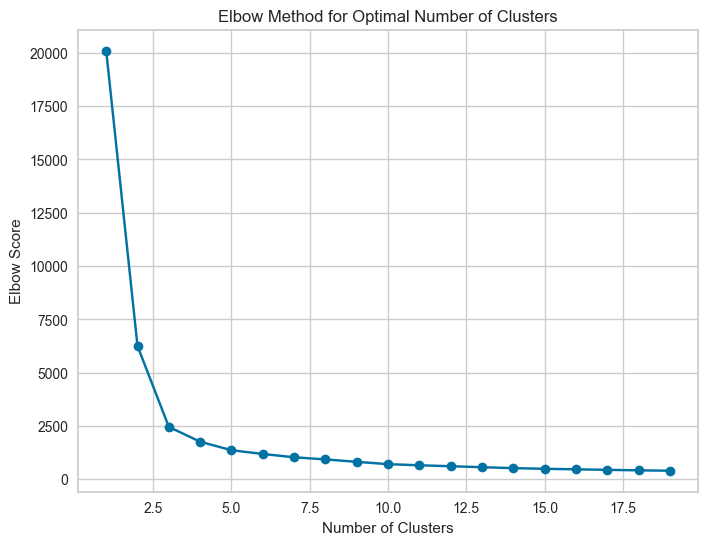

In [129]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

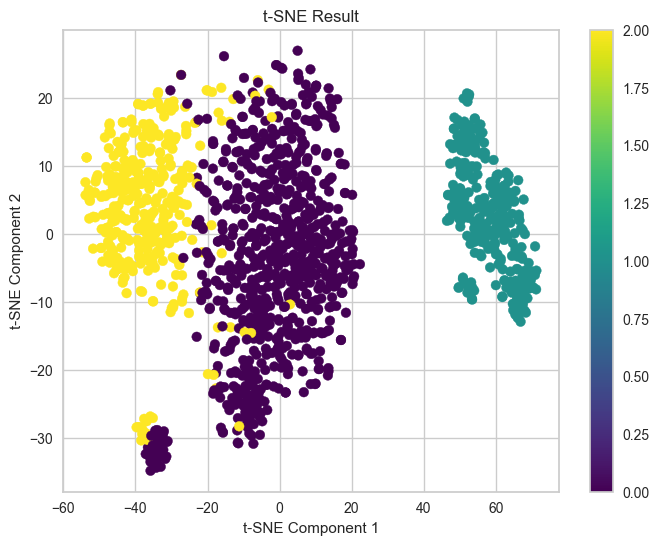

In [131]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = clusters

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Result')
plt.colorbar()
plt.show()

c:\Users\enric\Documents\Projects\Unsupervised_Exam\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


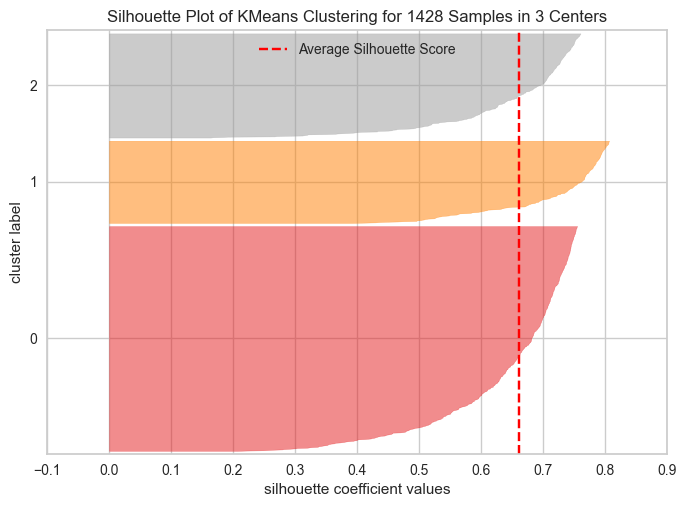

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1428 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [134]:
from yellowbrick.cluster import SilhouetteVisualizer

# Convert tsne_result to float32
tsne_result = tsne_result.astype('float32')

# Create a SilhouetteVisualizer instance with the KMeans model
silhouette_visualizer = SilhouetteVisualizer(kmeans)

# Fit the visualizer with the PCA DataFrame (including the cluster labels)
silhouette_visualizer.fit(pca_df)

# Show the silhouette plot
silhouette_visualizer.show()

In [135]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

#Evaluate the obtained clusters

# Silhouette Score
silhouette_avg = silhouette_score(pca_result, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print("The silhouette score ranges from -1 to 1. A score close to 1 indicates that the data points are well-clustered, while a score close to -1 indicates that the data points are poorly clustered.")

# Davies-Bouldin Index
db_index = davies_bouldin_score(pca_result, clusters)
print(f'Davies-Bouldin Index: {db_index}')
print("The Davies-Bouldin index is a measure of the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(pca_result, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')
print("The Calinski-Harabasz index is a ratio of the sum of between-clusters dispersion and of inter-cluster dispersion. Higher values indicate better clustering.")

Silhouette Score: 0.6045052059684901
The silhouette score ranges from -1 to 1. A score close to 1 indicates that the data points are well-clustered, while a score close to -1 indicates that the data points are poorly clustered.
Davies-Bouldin Index: 0.5113986624731951
The Davies-Bouldin index is a measure of the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.
Calinski-Harabasz Index: 4823.987937872341
The Calinski-Harabasz index is a ratio of the sum of between-clusters dispersion and of inter-cluster dispersion. Higher values indicate better clustering.


In [155]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

# Analyze each cluster. Show the quantity of data for each feature in each cluster
cluster_data = pd.concat([df, pca_df], axis=1)
cluster_means = cluster_data.groupby('Cluster').mean()

# Create a DataFrame to store the percentage of each value for every feature in each cluster
percentage_df = pd.DataFrame()

features = df.columns  # Include all features

for feature in features:
    cluster_counts = cluster_data.groupby('Cluster')[feature].value_counts(normalize=True).unstack().fillna(0)
    for cluster in cluster_counts.index:
        values = {}
        for value in cluster_counts.columns:
            if feature in val_mapping:
                for key in val_mapping[feature]:
                    if val_mapping[feature][key] == value:
                        value_name = key
                        break
            else:
                value_name = value

            values[value_name] = cluster_counts.loc[cluster, value] * 100
        
        # for the age just put average
        if feature == 'age':
            values = {'Average Age': cluster_means.loc[cluster, 'age']}
        
        percentage_df.loc[f'Cluster {cluster}', f'{feature}'] = "".join([f"{key}: {values[key]:.2f}% - " for key in values])

# Display the DataFrame
pd.set_option('display.max_colwidth', None)
percentage_df
percentage_df.to_csv('cluster_data.csv', index=True)

The average silhouette score is: 0.6045052059684901


The average silhouette score is: 0.6045052059684901


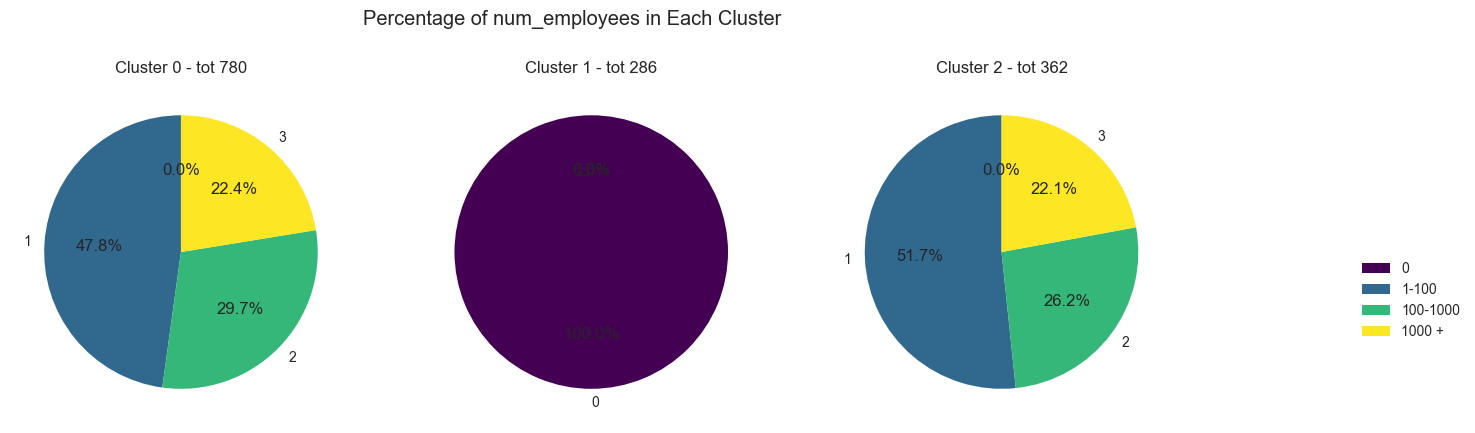

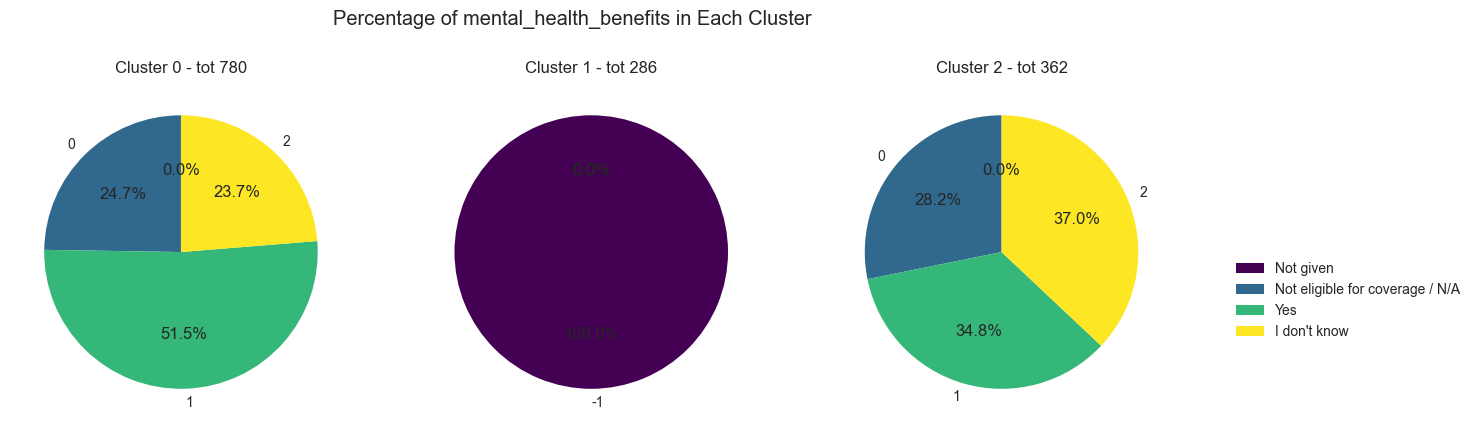

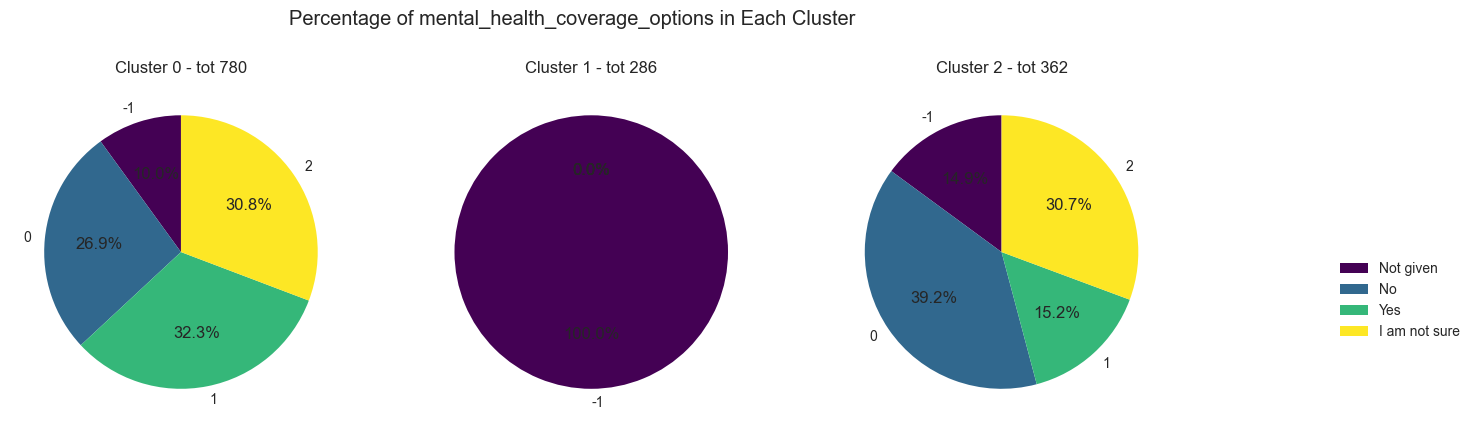

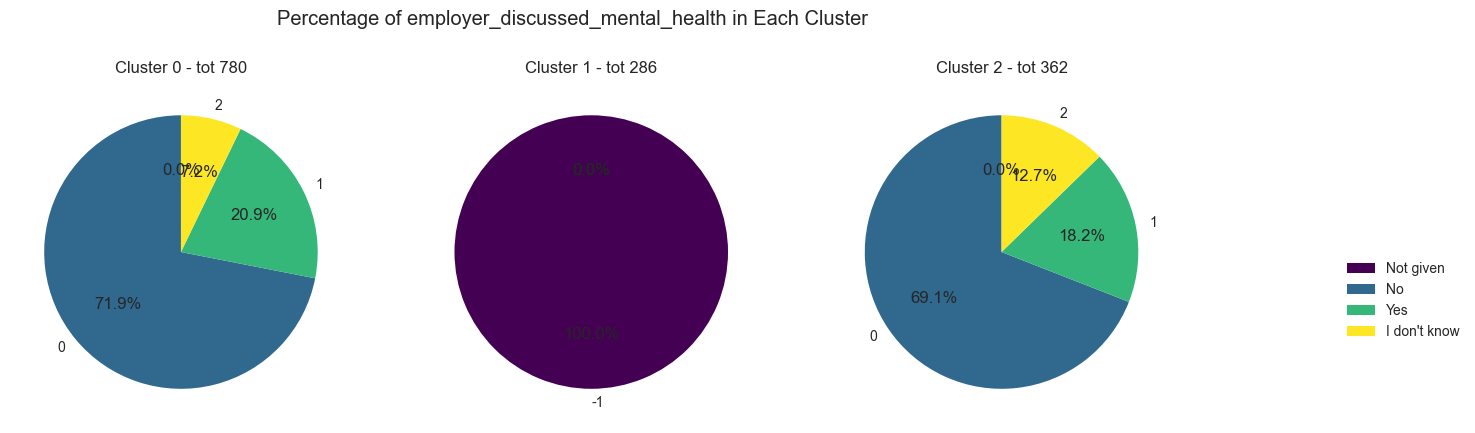

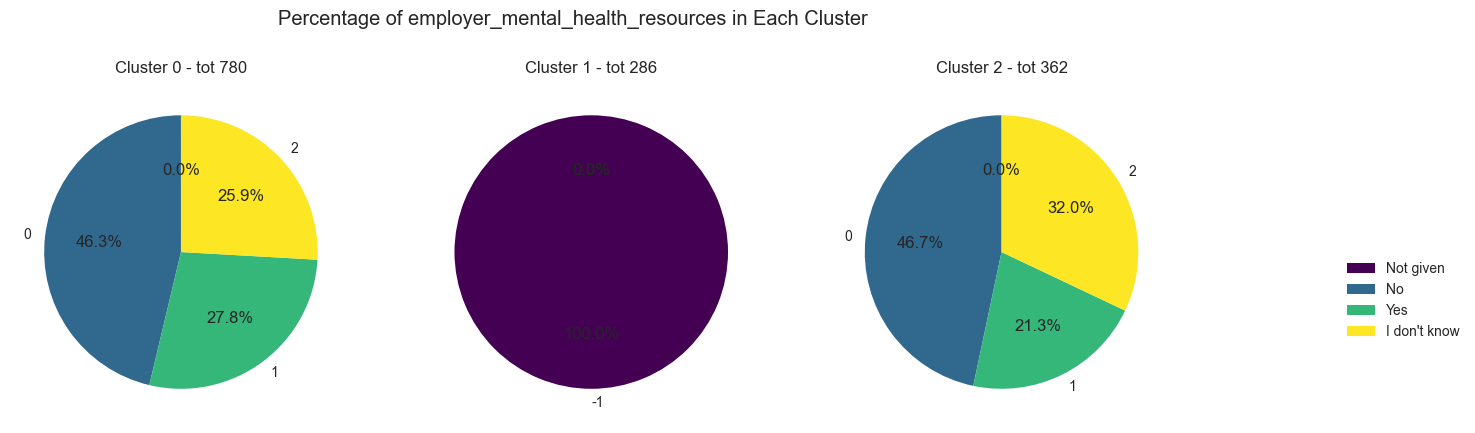

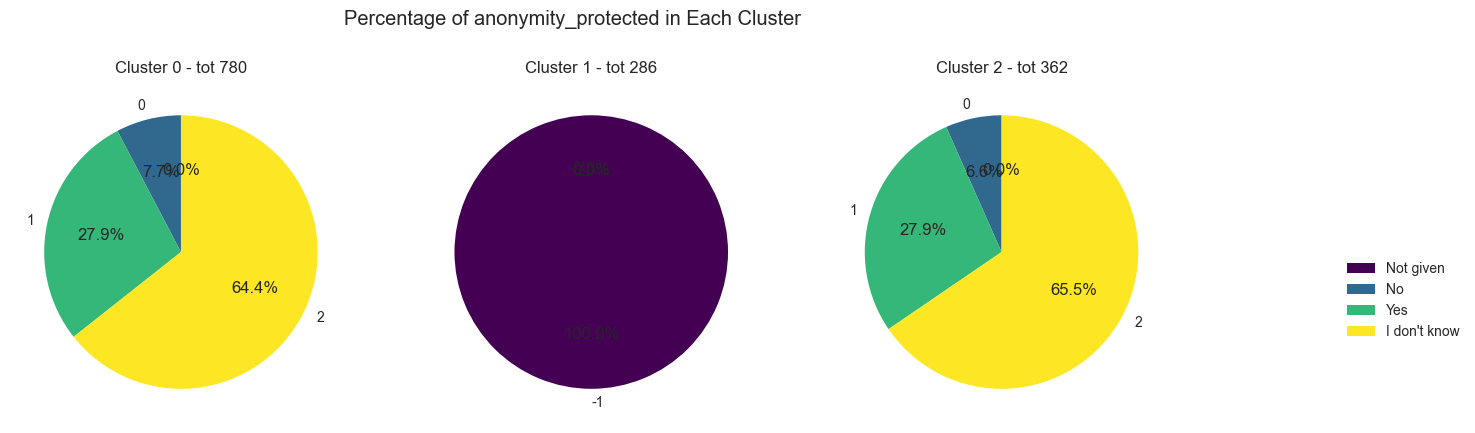

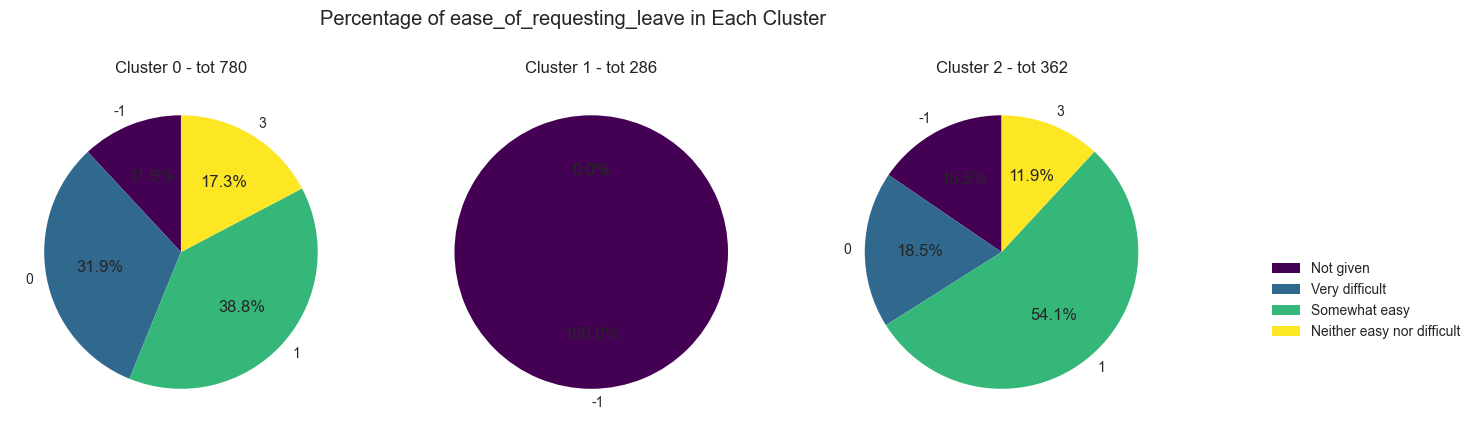

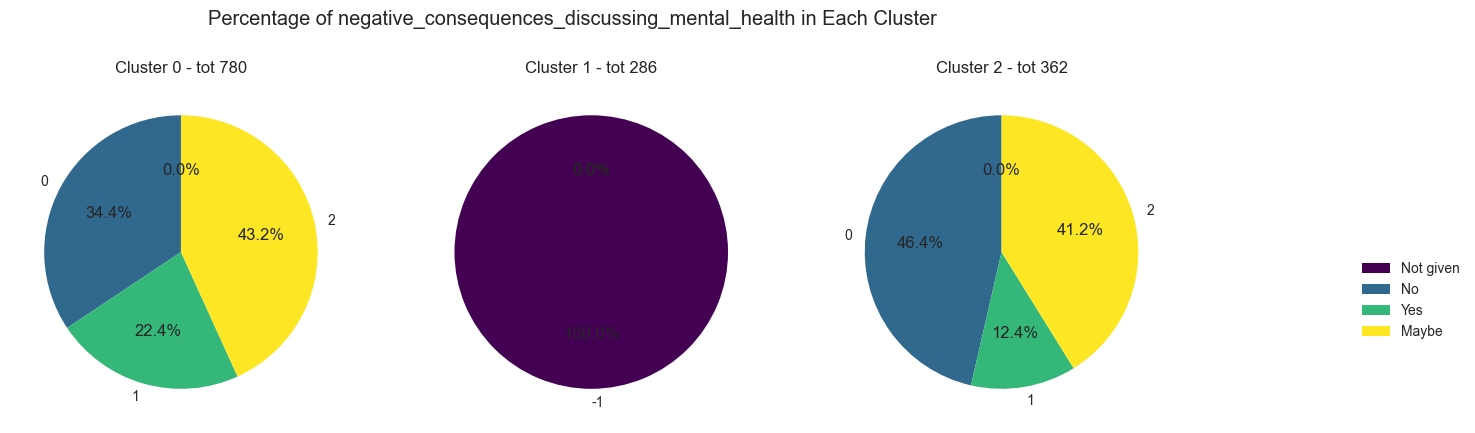

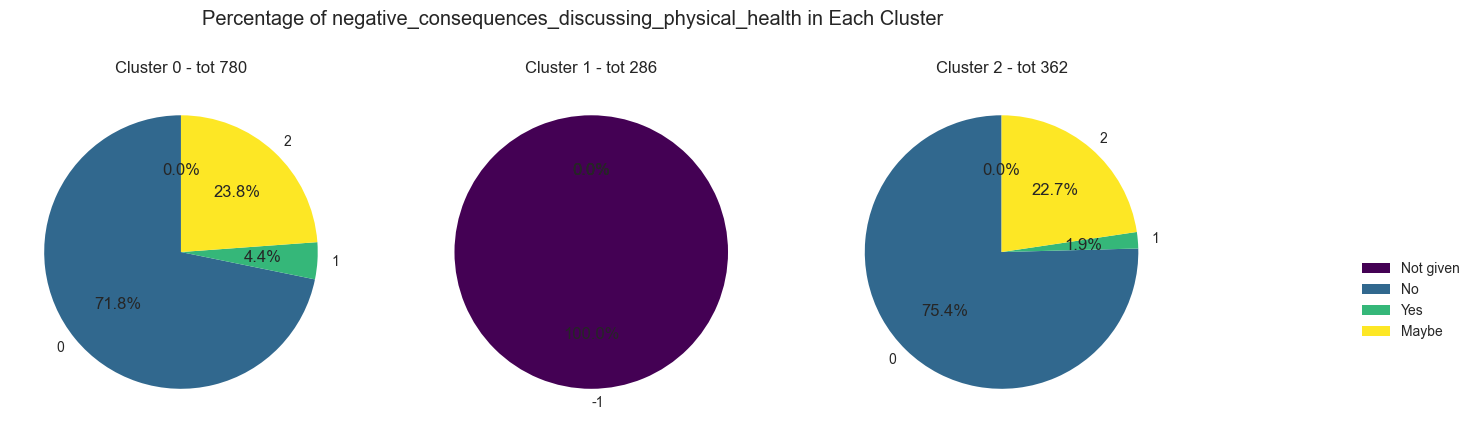

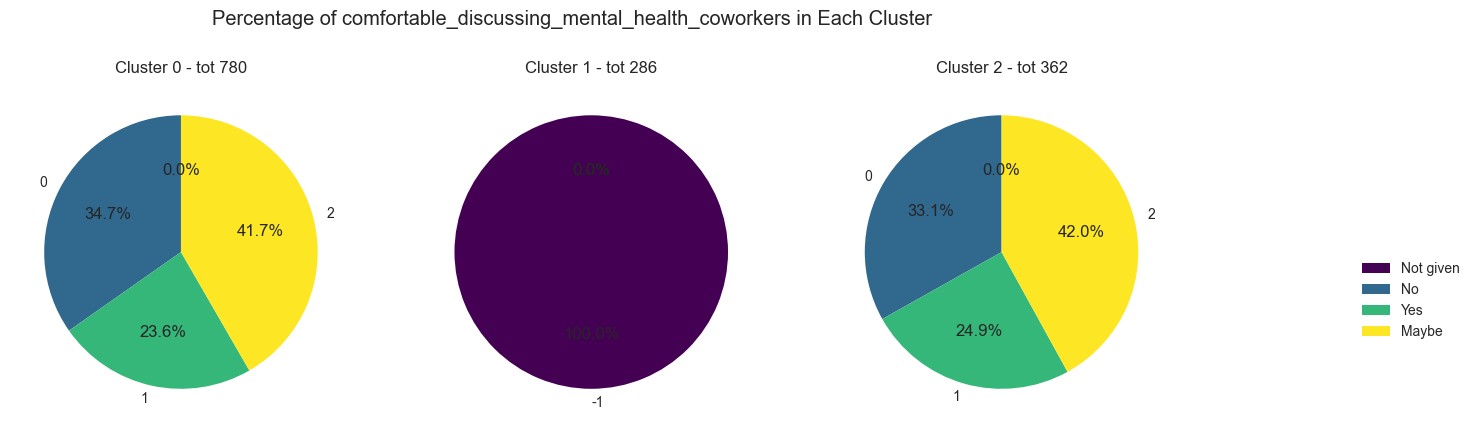

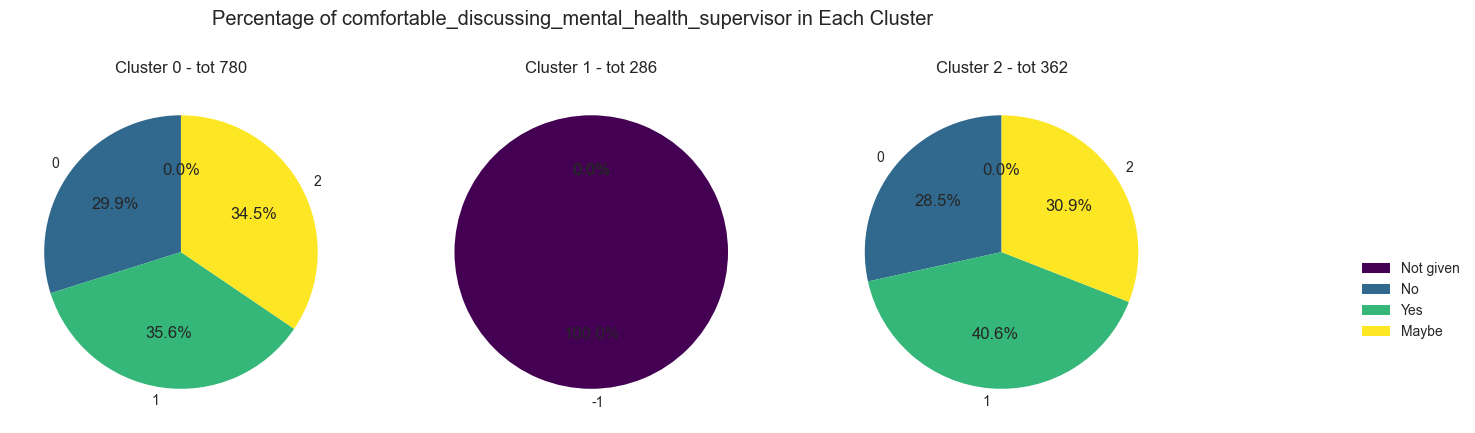

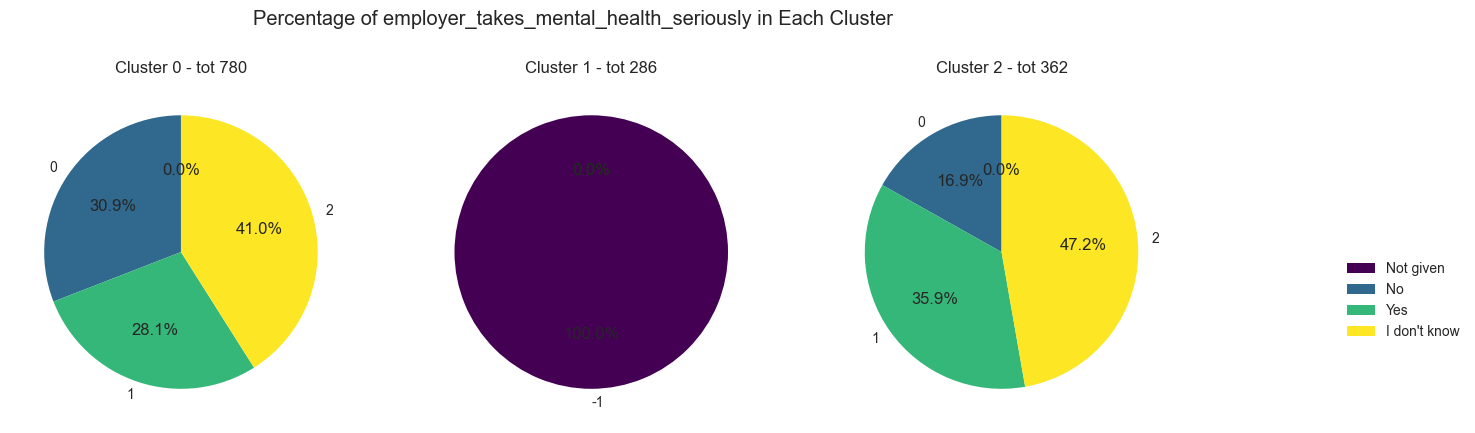

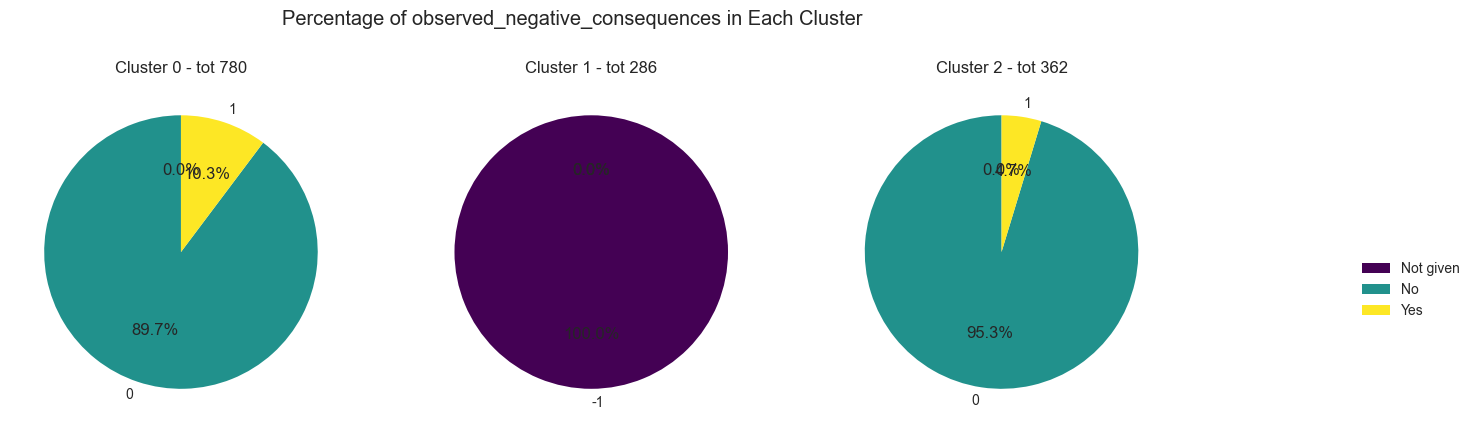

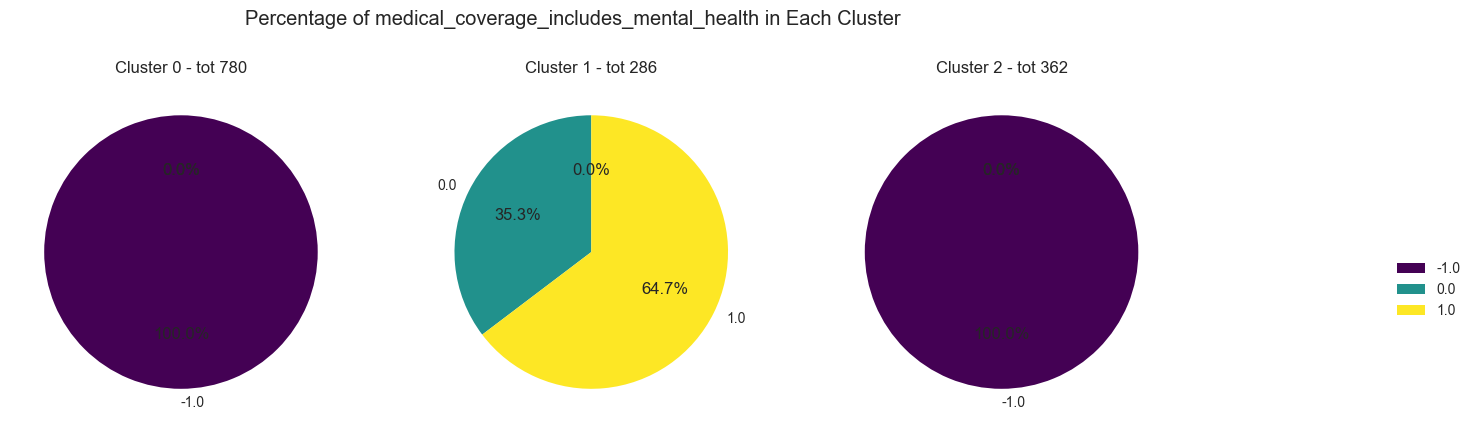

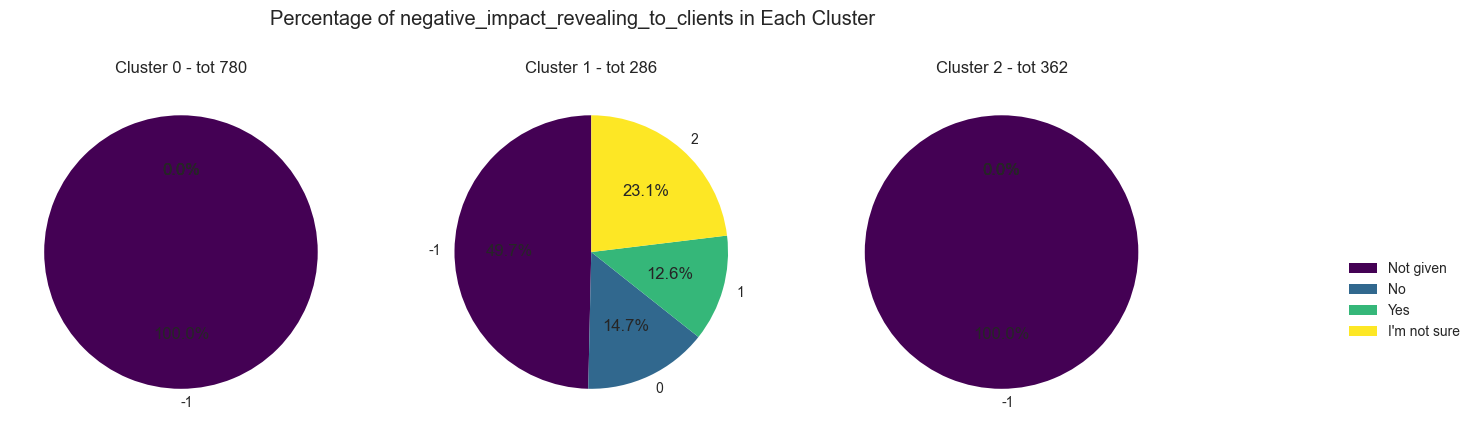

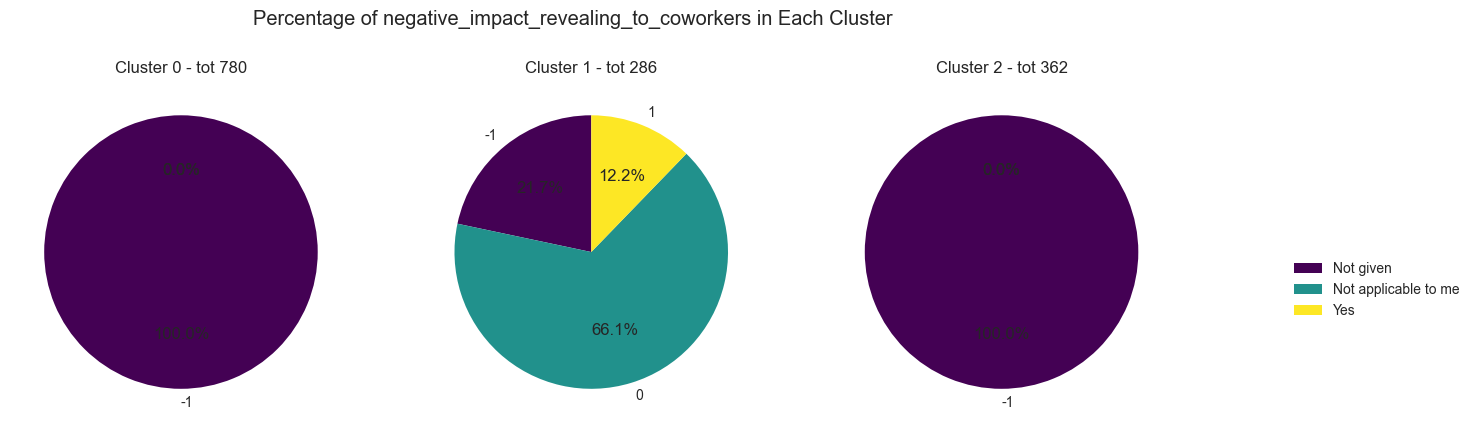

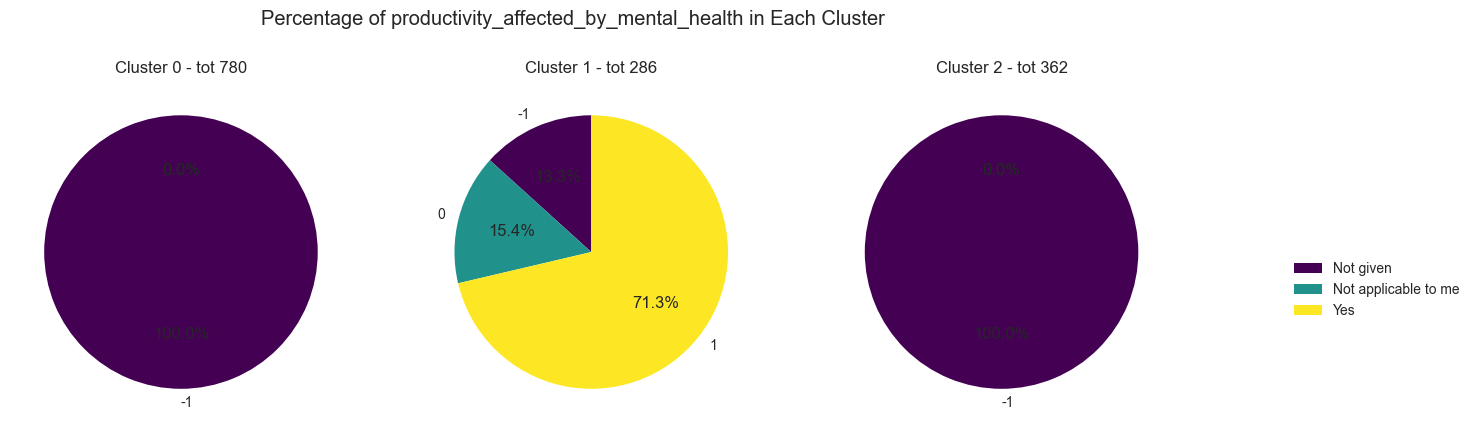

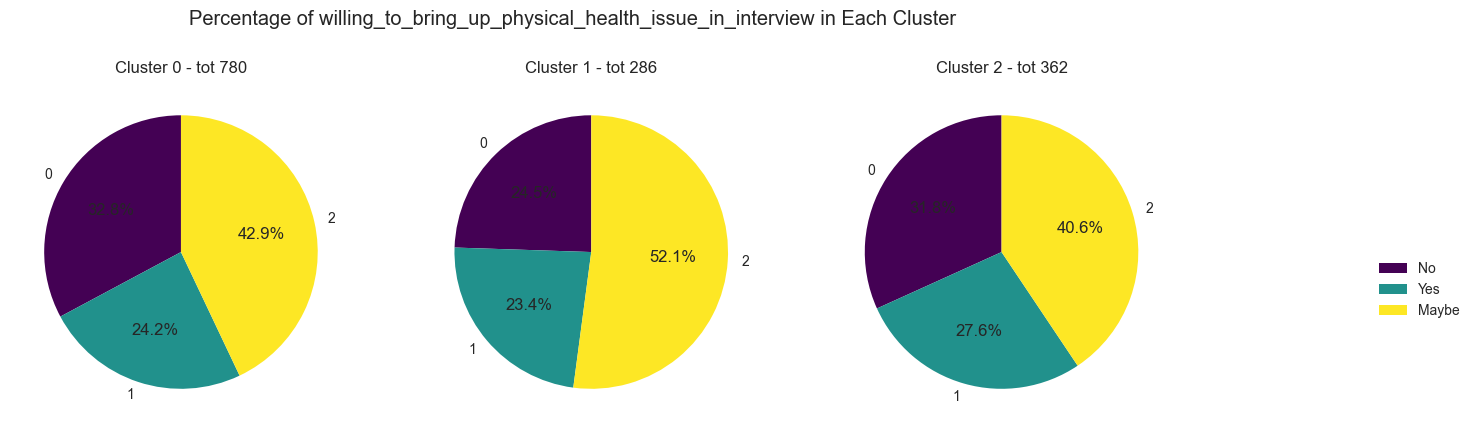

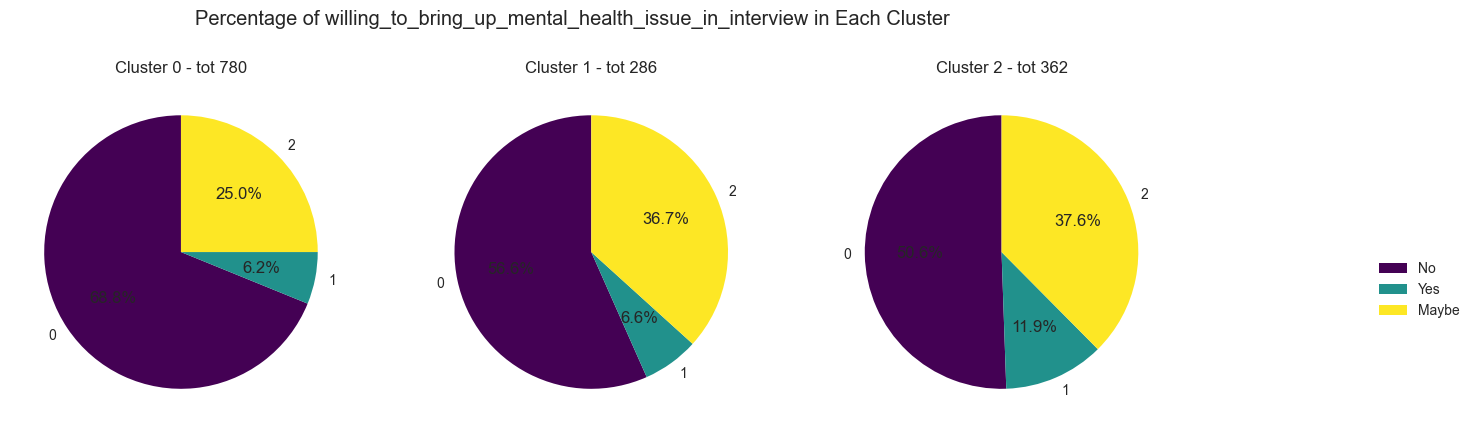

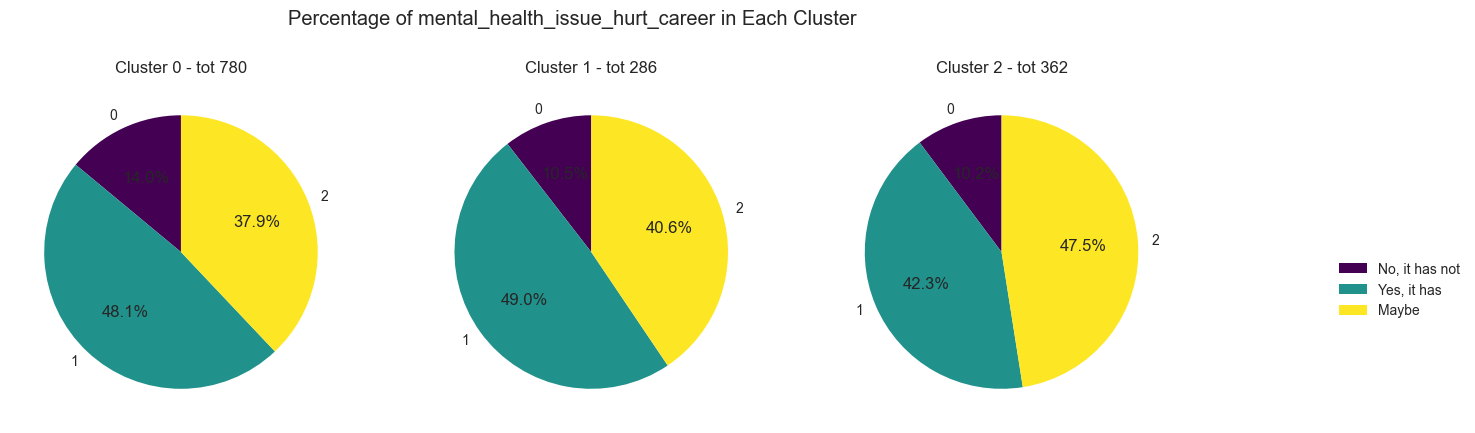

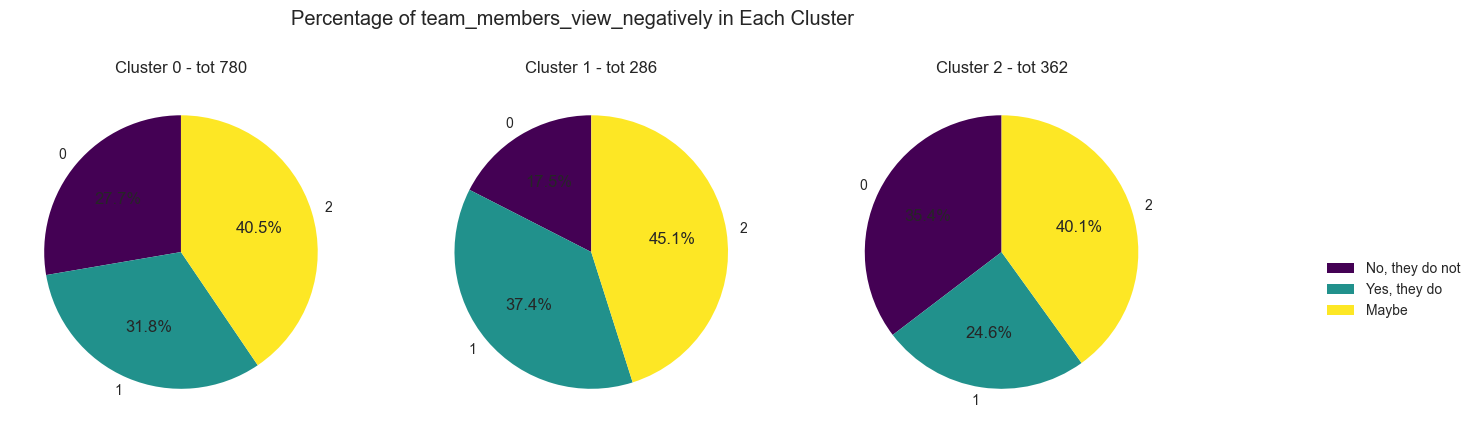

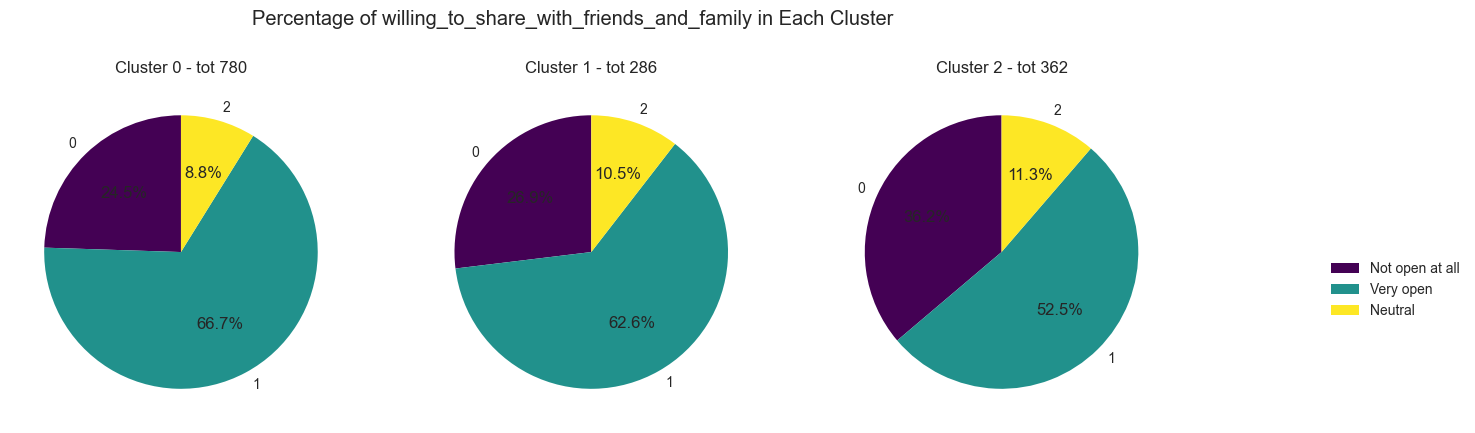

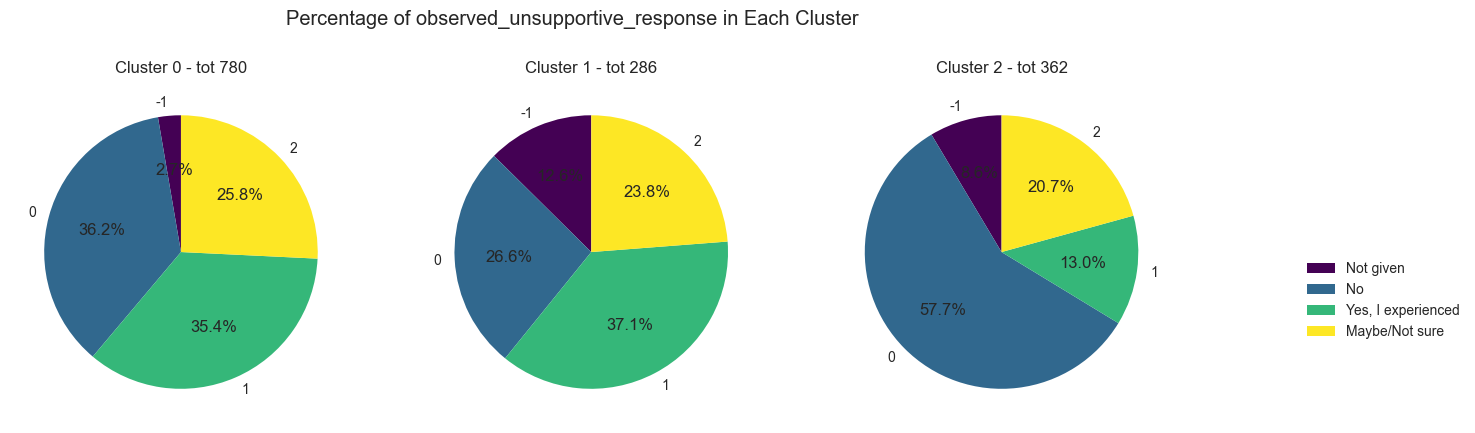

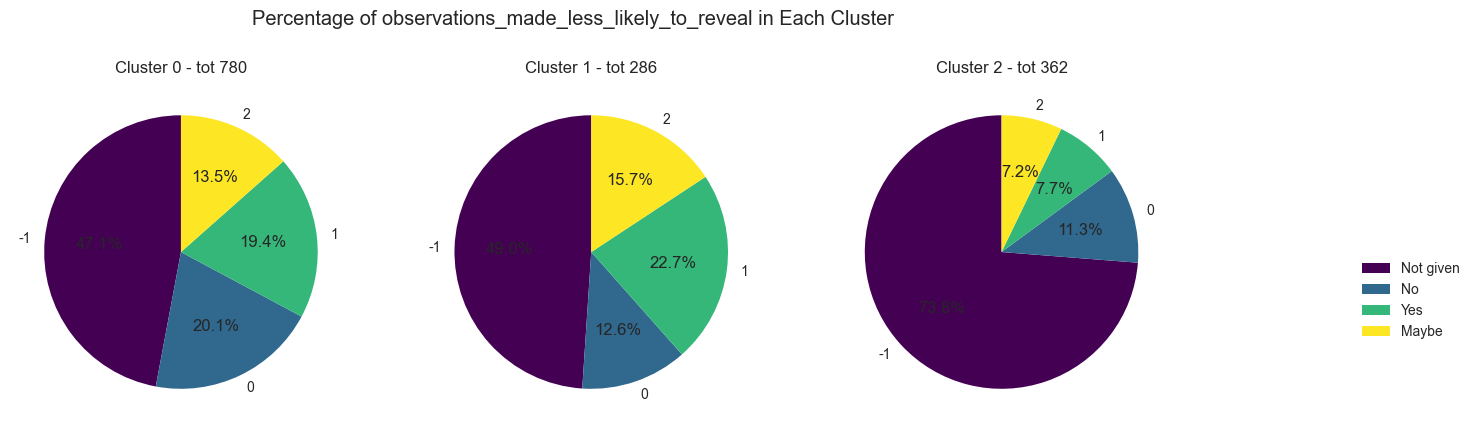

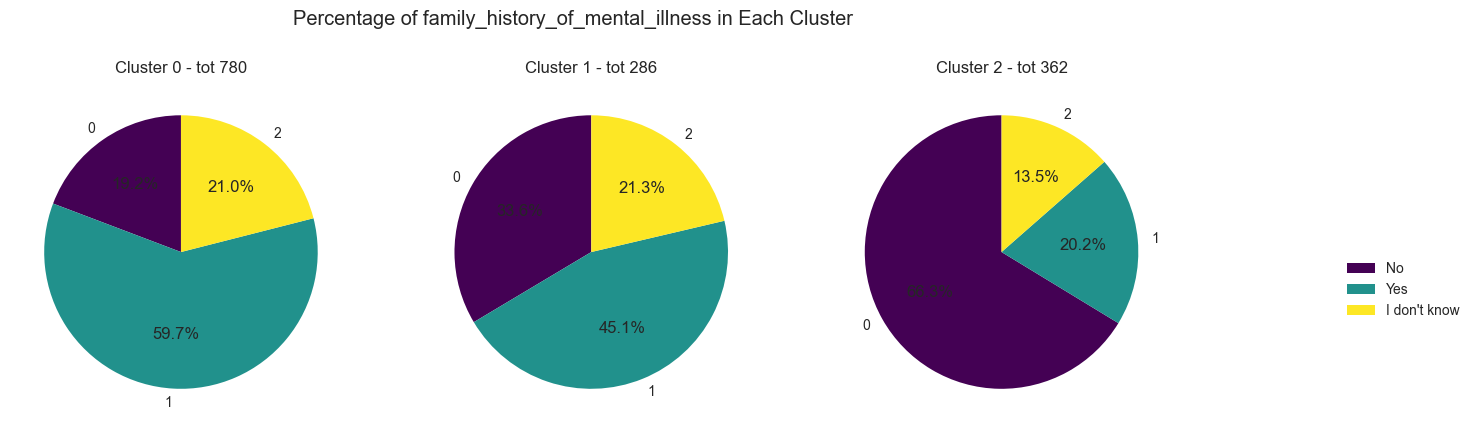

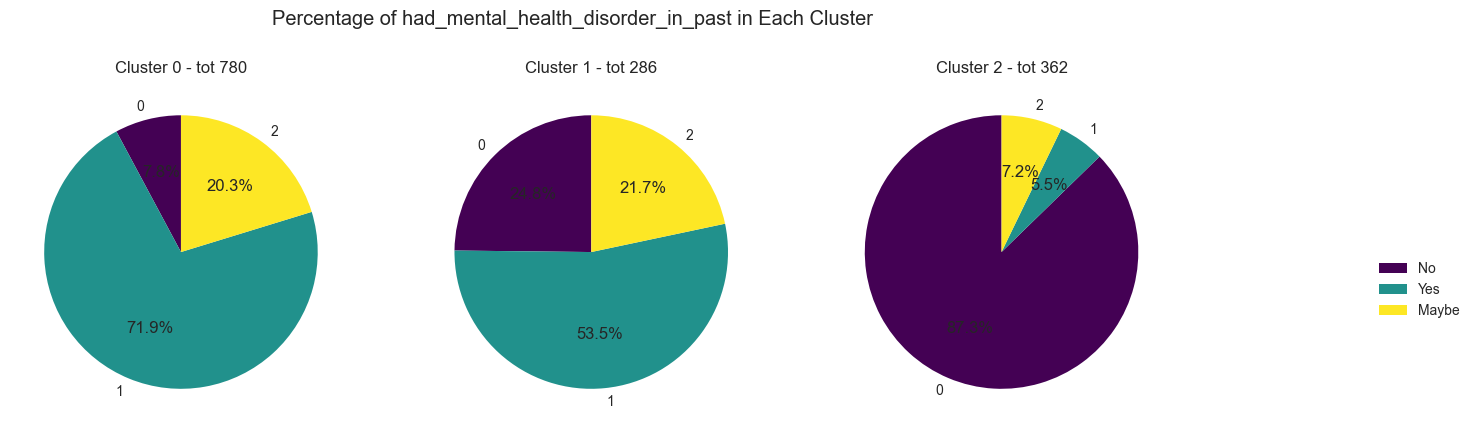

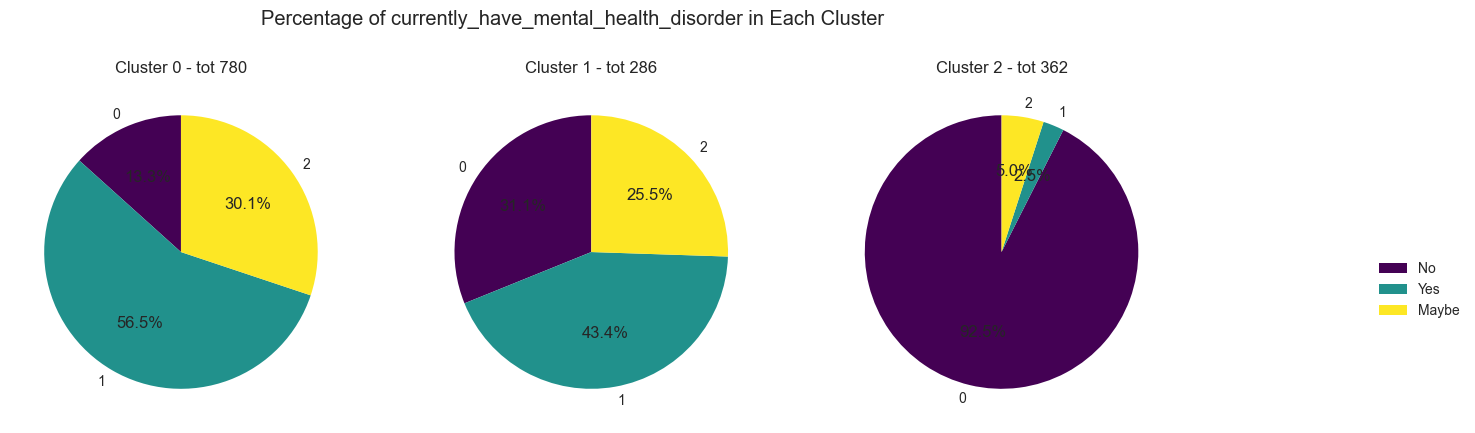

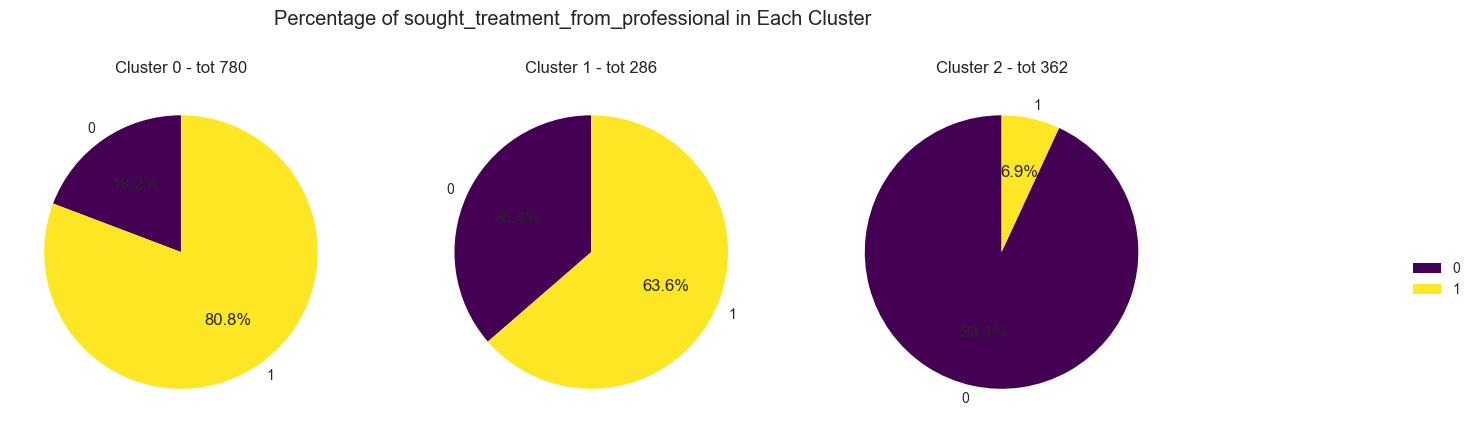

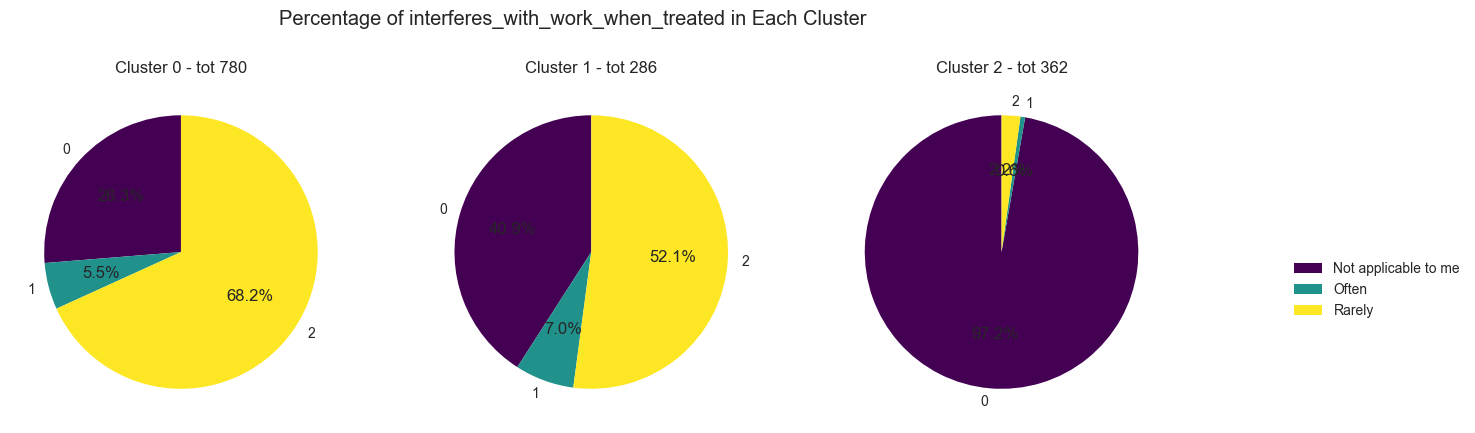

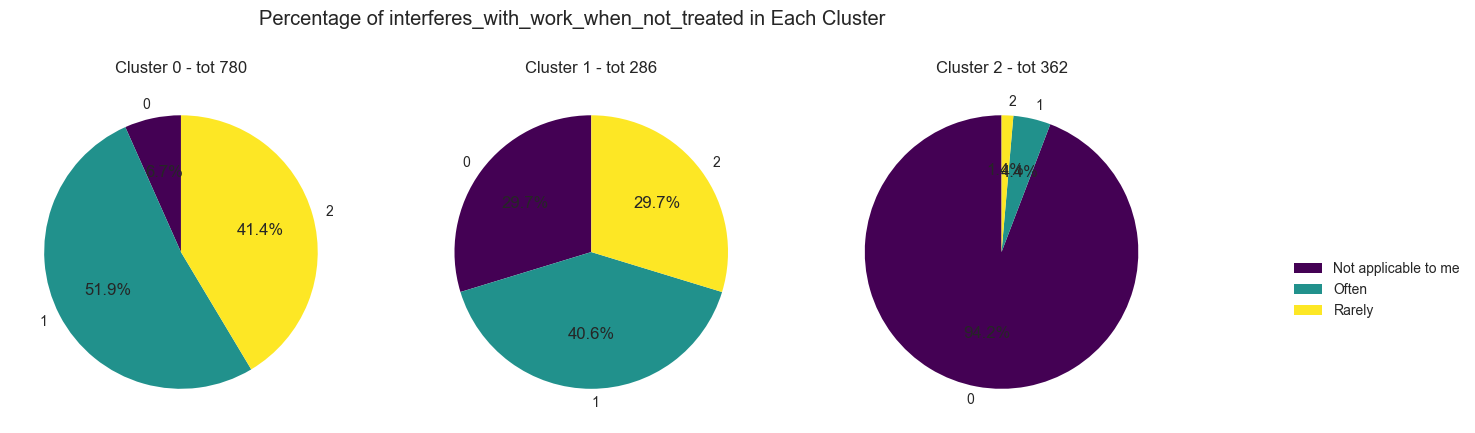

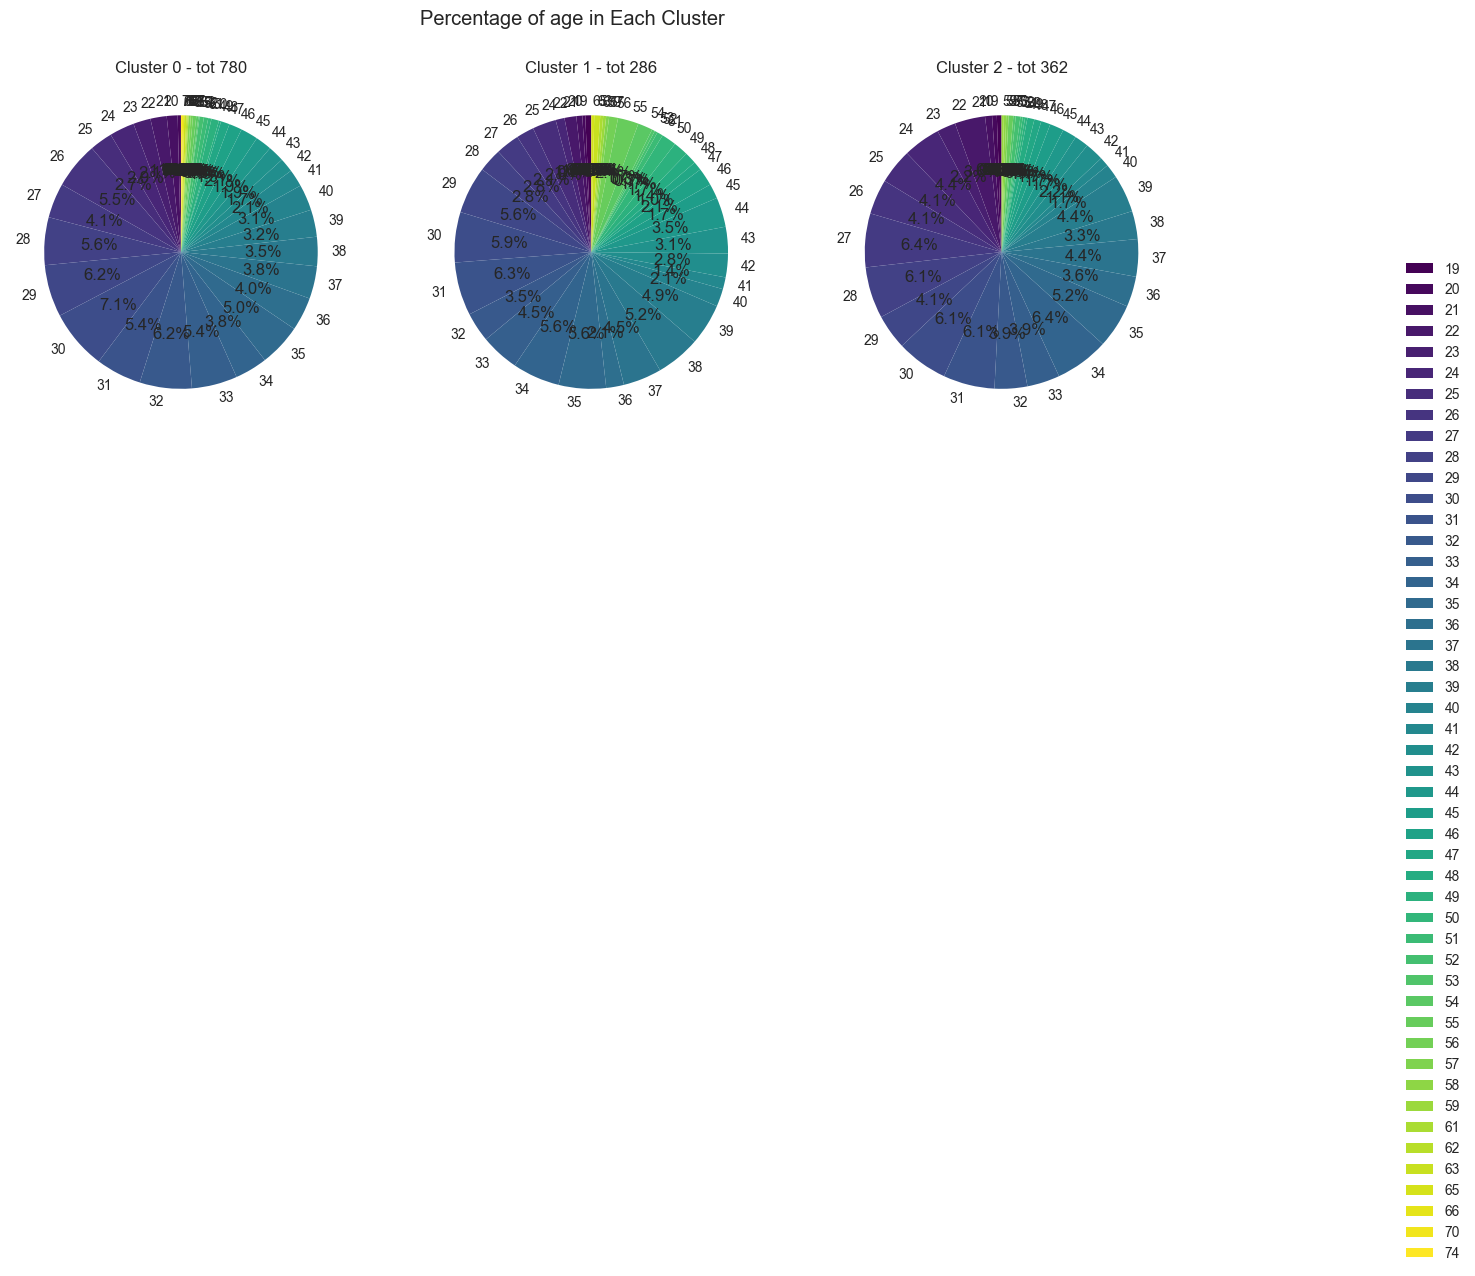

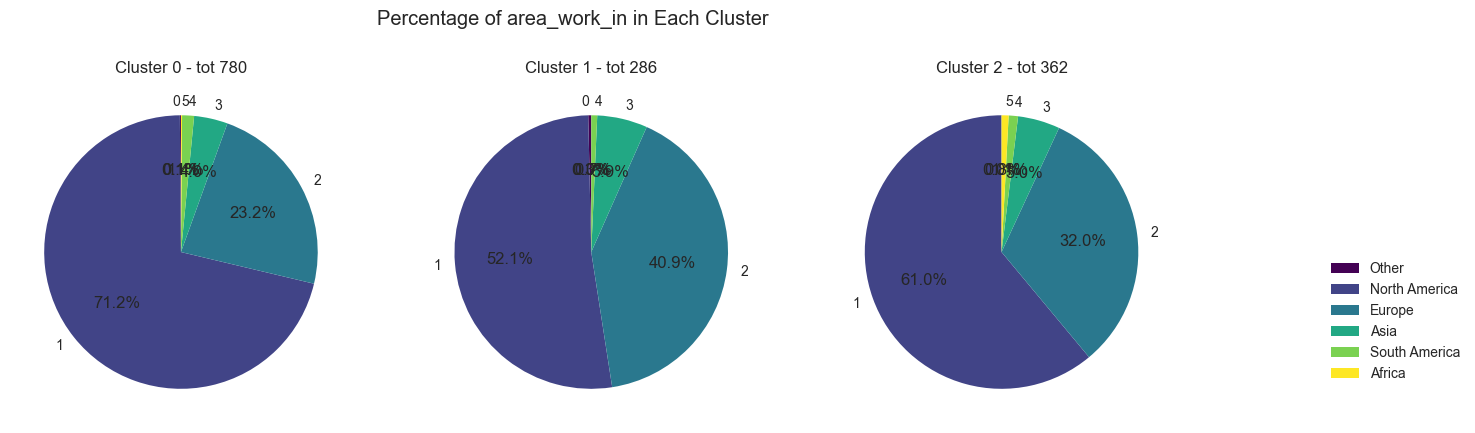

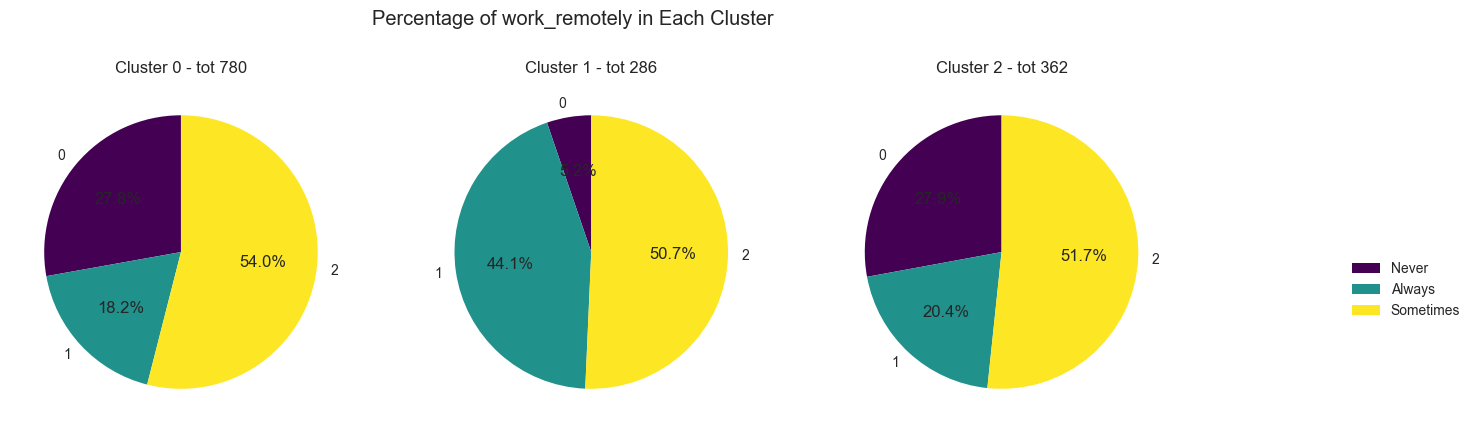

In [147]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

# Analyze each cluster. Show the quantity of data for each feature in each cluster
cluster_data = pd.concat([df, pca_df], axis=1)
cluster_data.groupby('Cluster').mean()

# Visualize the percentage of each value for every feature in each cluster
features = df.columns[:-1]  # Exclude the 'cluster' column

for feature in features:
    cluster_counts = cluster_data.groupby('Cluster')[feature].value_counts(normalize=True).unstack().fillna(0)
    fig, axes = plt.subplots(1, cluster_counts.shape[0], figsize=(15, 5), sharey=True)
    for i, cluster in enumerate(cluster_counts.index):
        cluster_counts.loc[cluster].plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[i])
        axes[i].set_title(f'Cluster {cluster} - tot {cluster_data[cluster_data["Cluster"] == cluster].shape[0]}')
        axes[i].set_ylabel('')
    
    # Create a single legend for the entire figure
    if feature in val_mapping:
        labels = {v: k for k, v in val_mapping[feature].items()}
        legend_labels = ["Not given" if item == -1 else labels.get(item, item) for item in cluster_counts.columns]
    else:
        legend_labels = cluster_counts.columns
    fig.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.1, 0.5))
    
    plt.suptitle(f'Percentage of {feature} in Each Cluster')
    plt.show()

Conclusions

